# Capstone Project - Employee Attrition Data

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score,precision_score,accuracy_score
from sklearn.linear_model import LogisticRegression
import time
# First we will get the dataset 

TotalData = pd.read_csv('C:/DataScience-Learnbay/CapstoneProject/HR_Employee_Attrition_Data.csv')

In [74]:
# Lets look at the top 10 rows of the dataset to have a glance of what the data looks like
TotalData.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,2,80,2,17,3,2,7,7,7,7


# INSIGHTS FROM THE DATASET

In [75]:
TotalData.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 1. Let us first try to understand the proportion or percentage of attrition

shape of the dataset (2940, 35)
Total number of records available is 2940
Count of people who left in the attrition is 474
Percentage of people who left in the attrition is 16.122448979591837
Count of people who didnot leave in the attrition is 2466
Percentage of people who didnot leave in the attrition is 83.87755102040816


Text(0.5, 1.0, 'Attrition Vs Non Attrition counts')

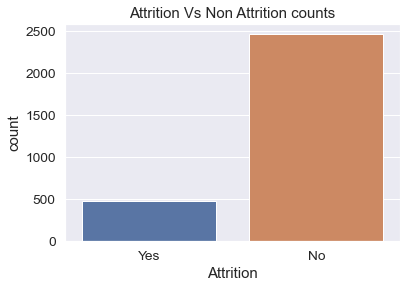

In [76]:
print("shape of the dataset",TotalData.shape)
print("Total number of records available is {count}".format(count=TotalData.shape[0]))

data_attrition = TotalData[TotalData['Attrition']=='Yes']

print("Count of people who left in the attrition is {data_attrition_count}".format(data_attrition_count = data_attrition.shape[0]))

print("Percentage of people who left in the attrition is",(data_attrition.shape[0]/TotalData.shape[0])*100)

data_not_attrition = TotalData[TotalData['Attrition']=='No']

print("Count of people who didnot leave in the attrition is {data_not_attrition_count}".format(data_not_attrition_count = data_not_attrition.shape[0]))

print("Percentage of people who didnot leave in the attrition is",(data_not_attrition.shape[0]/TotalData.shape[0])*100)

fig = plt.figure()
g = sns.countplot(data=TotalData,x='Attrition')
plt.title("Attrition Vs Non Attrition counts")

### a. Now , Lets calculate the count of employees per department from the total dataset

In [77]:
total_count_per_dept = TotalData.groupby(['Department'])['EmployeeNumber'].agg(Count='count').reset_index()
print(total_count_per_dept)

               Department  Count
0         Human Resources    126
1  Research & Development   1922
2                   Sales    892


# 2. Lets see the attrition per Department

### a. Now , Lets calculate the count of employees per department from the dataset where attrition is Yes

In [78]:
data_attrition_by_dept = data_attrition.groupby(['Department'])['EmployeeNumber'].agg(Count='count').reset_index()
print(data_attrition_by_dept)


               Department  Count
0         Human Resources     24
1  Research & Development    266
2                   Sales    184


#### Insight -> So , from the above frame we can see the total count of attrition per department tells us that Research and Development has highest counts of attrition , followed by Sales and Human Resources 

### b. But now , lets see the percentage of attrition from each department

               Department  Percentage
0         Human Resources   19.047619
1  Research & Development   13.839750
2                   Sales   20.627803


Text(0.5, 1.0, 'Department with Highest attrition percentage')

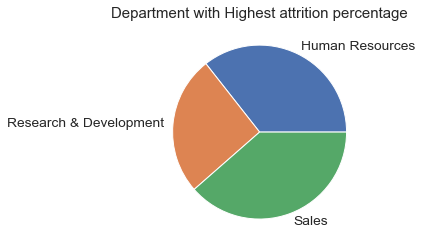

In [79]:
attrition_percentage_dict={}
for index,row in total_count_per_dept.iterrows():
    for index2,row2 in data_attrition_by_dept.iterrows():
        if(row['Department']==row2['Department']):
            attrition_percent=(row2['Count']/row['Count'])*100
    if(not attrition_percentage_dict):
        attrition_percentage_dict.update({'Department':[row['Department']],'Percentage':[attrition_percent]})
    else:
        attrition_percentage_dict['Department'].append(row['Department'])
        attrition_percentage_dict['Percentage'].append(attrition_percent)

attrition_percentage_per_dept = pd.DataFrame(data=attrition_percentage_dict)    
print(attrition_percentage_per_dept)

fig = plt.figure()
h = plt.pie(data=attrition_percentage_per_dept,x='Percentage',labels='Department')
plt.title("Department with Highest attrition percentage")

#### Insight -> So attrition percentage per department shows Sales and HR department has the highest percentage of attrition followed by Research and Development

# 3. Lets see the highest attrition at Department and JobLevel together

### a. Now , Lets calculate the count of employees per department and joblevel from the entire dataset

In [80]:
total_count_per_dept_joblevel = TotalData.groupby(['Department','JobLevel'])['EmployeeNumber'].agg(Count='count').reset_index()
total_count_per_dept_joblevel = total_count_per_dept_joblevel.sort_values(['Count'],ascending=[False])
print(total_count_per_dept_joblevel)

                Department  JobLevel  Count
5   Research & Development         1    868
6   Research & Development         2    562
11                   Sales         2    480
7   Research & Development         3    258
12                   Sales         3    166
10                   Sales         1    152
8   Research & Development         4    136
9   Research & Development         5     98
13                   Sales         4     68
0          Human Resources         1     66
1          Human Resources         2     26
14                   Sales         5     26
4          Human Resources         5     14
2          Human Resources         3     12
3          Human Resources         4      8


### b. Now , Lets calculate the count of employees per department and JobLevel from the subset where attrition has happened

In [81]:
data_attrition_by_dept_joblevel = data_attrition.groupby(['Department','JobLevel'])['EmployeeNumber'].agg(Count='count').reset_index()
data_attrition_by_dept_joblevel = data_attrition_by_dept_joblevel.sort_values(['Count'],ascending=[False])
print(data_attrition_by_dept_joblevel)

                Department  JobLevel  Count
2   Research & Development         1    202
8                    Sales         2     74
7                    Sales         1     64
9                    Sales         3     34
3   Research & Development         2     30
4   Research & Development         3     26
0          Human Resources         1     20
10                   Sales         4      8
6   Research & Development         5      6
1          Human Resources         3      4
11                   Sales         5      4
5   Research & Development         4      2


### c. Now lets first checkout the attrition distribution at all the joblevels

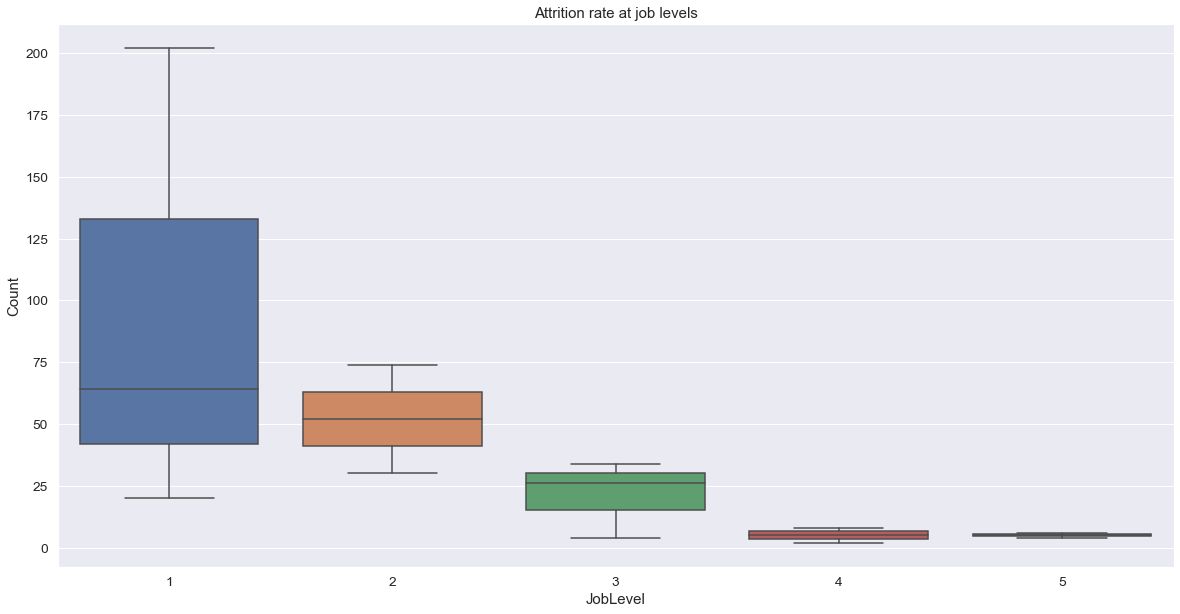

In [82]:
fig = plt.figure(figsize=(20,10))
plt.title("Attrition rate at job levels")
# fig = plt.figure()
h=sns.boxplot(x='JobLevel',y='Count',data=data_attrition_by_dept_joblevel)

#### Insight - So as we can see from above that most of the people who had left during attrition belonged to the lowest Job Level that is 1 followed by Job Level 2 

### d. But now , lets see the percentage of attrition at each department and job level

                Department  JobLevel  Percentage
13         Human Resources         3   33.333333
14         Human Resources         4   33.333333
9          Human Resources         1   30.303030
10         Human Resources         2   30.303030
12         Human Resources         5   15.384615
0   Research & Development         1   23.271889
3   Research & Development         3   10.077519
7   Research & Development         5    6.122449
1   Research & Development         2    5.338078
6   Research & Development         4    1.470588
5                    Sales         1   42.105263
4                    Sales         3   20.481928
2                    Sales         2   15.416667
11                   Sales         5   15.384615
8                    Sales         4   11.764706


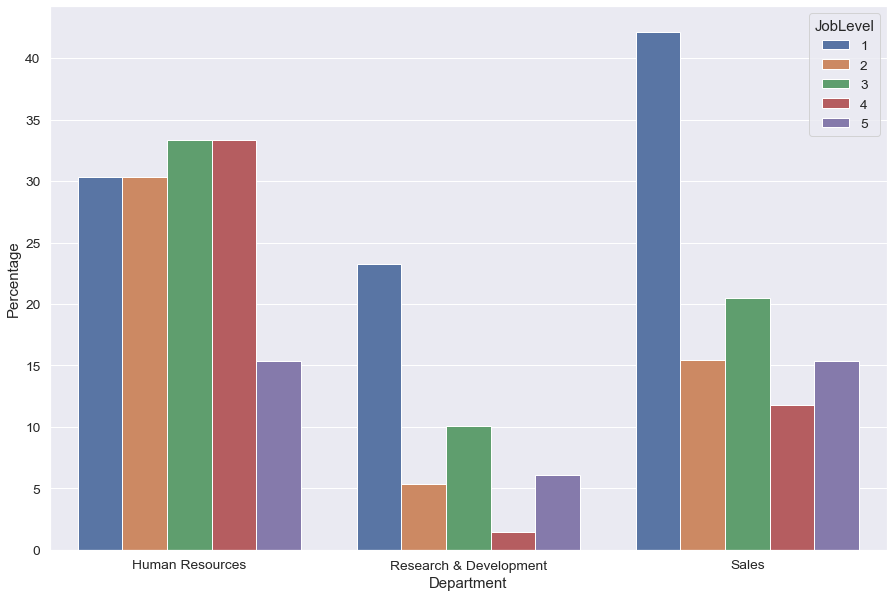

In [83]:
attrition_percentage_dict={}
for index,row in total_count_per_dept_joblevel.iterrows():
    for index2,row2 in data_attrition_by_dept_joblevel.iterrows():
        if(row['Department']==row2['Department'] and row['JobLevel']==row2['JobLevel']):
            attrition_percent=(row2['Count']/row['Count'])*100
    if(not attrition_percentage_dict):
        attrition_percentage_dict.update({'Department':[row['Department']],'JobLevel':[row['JobLevel']],'Percentage':[attrition_percent]})
    else:
        attrition_percentage_dict['Department'].append(row['Department'])
        attrition_percentage_dict['JobLevel'].append(row['JobLevel'])
        attrition_percentage_dict['Percentage'].append(attrition_percent)

attrition_percentage_per_dept_joblevel = pd.DataFrame(data=attrition_percentage_dict)    
attrition_percentage_per_dept_joblevel = attrition_percentage_per_dept_joblevel.sort_values(['Department','Percentage'],ascending=[True,False])
print(attrition_percentage_per_dept_joblevel)


fig = plt.figure(figsize=(15,10))
h = sns.barplot(data=attrition_percentage_per_dept_joblevel,x='Department',y='Percentage',hue='JobLevel')


#### Insight - a. In the previous graph we concluded that lower job levels are the most affected and this graph also shows that lower job levels in all the departments . 
#### Insight - b. In both RnD and Sales, JobLevel 1 had the highest proportion of people of leaving in attrition . 
#### Insight - c. In HR , JobLevel 1,2,3,4 all four had high and almost equal attrition percentage which is again an indicator to an earlier insight that HR department has the highest percentage of attrition

# 4. Lets try to understand based on Gender what is the attrition rate

### a. Now , Lets calculate the count of employees per Gender from the total data set 

In [84]:
total_count_per_gender = TotalData.groupby(['Gender'])['EmployeeNumber'].agg(Count='count').reset_index()
total_count_per_gender = total_count_per_gender.sort_values(['Count'],ascending=[False])
print(total_count_per_gender)

   Gender  Count
1    Male   1764
0  Female   1176


### b. Now , Lets calculate the count of employees per Gender from the subset where attrition has happened

   Gender  Count
0    Male    300
1  Female    174


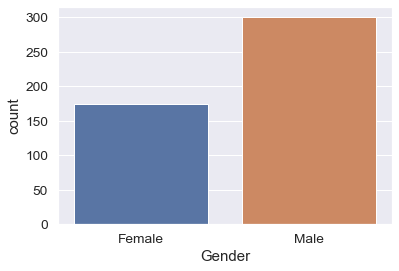

In [85]:
data_attrition_by_gender = data_attrition['Gender'].value_counts().reset_index()
data_attrition_by_gender.rename(columns={'index':'Gender','Gender':'Count'},inplace=True)
print(data_attrition_by_gender)

fig = plt.figure()
h = sns.countplot(data=data_attrition,x='Gender')

#### Insight - So as we can see from the graph above , amongst the people who left in the Attrition number of males are higher with a count of 300 while that of female is almost half of that with 174

### c. But now , lets see the percentage of attrition per Gender

   Gender  Percentage
0    Male   17.006803
1  Female   14.795918


Text(0.5, 1.0, 'Attrition percentage for each gender')

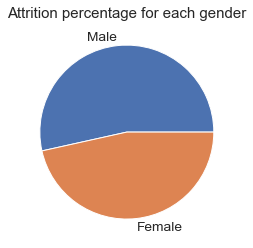

In [86]:
attrition_percentage_dict={}
for index,row in total_count_per_gender.iterrows():
    for index2,row2 in data_attrition_by_gender.iterrows():
        if(row['Gender']==row2['Gender']):
            attrition_percent=(row2['Count']/row['Count'])*100
    if(not attrition_percentage_dict):
        attrition_percentage_dict.update({'Gender':[row['Gender']],'Percentage':[attrition_percent]})
    else:
        attrition_percentage_dict['Gender'].append(row['Gender'])
        attrition_percentage_dict['Percentage'].append(attrition_percent)

attrition_percentage_per_gender = pd.DataFrame(data=attrition_percentage_dict)    
attrition_percentage_per_gender = attrition_percentage_per_gender.sort_values(['Percentage'],ascending=[False])
print(attrition_percentage_per_gender)

fig = plt.figure()
h = plt.pie(data=attrition_percentage_per_gender,x='Percentage',labels='Gender')
plt.title("Attrition percentage for each gender")

#### Insight - The pie chart tells us the percentage of male leaving is higher than that of female 

# 5. Lets try to understand based on Gender and Marital status together what is the attrition rate

### a. Now , Lets calculate the count of employees for Gender and Marital Status together from the total data set

In [87]:
total_count_per_gender_marital_status = TotalData.groupby(['Gender','MaritalStatus'])['EmployeeNumber'].agg(Count='count').reset_index()
total_count_per_gender_marital_status = total_count_per_gender_marital_status.sort_values(['Count'],ascending=[False])
print(total_count_per_gender_marital_status)

   Gender MaritalStatus  Count
4    Male       Married    802
1  Female       Married    544
5    Male        Single    542
3    Male      Divorced    420
2  Female        Single    398
0  Female      Divorced    234


### b. Now , Lets calculate the count of employees per Gender and Marital Status together from the subset where attrition has happened

   Gender MaritalStatus  Count
0    Male        Single    146
1    Male       Married    106
2  Female        Single     94
3  Female       Married     62
4    Male      Divorced     48
5  Female      Divorced     18


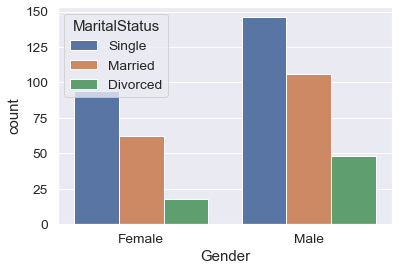

In [88]:
data_attrition_by_gender_marital_status = data_attrition[['Gender','MaritalStatus']].value_counts().reset_index()
data_attrition_by_gender_marital_status.rename(columns={0:'Count'},inplace=True)
data_attrition_by_gender_marital_status = data_attrition_by_gender_marital_status.sort_values(['Count'],ascending=[False])
print(data_attrition_by_gender_marital_status)

fig = plt.figure()
h = sns.countplot(data=data_attrition,x='Gender',hue='MaritalStatus')

#### Insight - As we can see from the chart above , amongst the people who left in attrition in both the genders -Single people had left in most numbers 

### c. But now , lets see the percentage of attrition per Gender and Marital Status together comparing the data from total data set and attrition-only data set from above

   Gender MaritalStatus  Percentage
2    Male        Single   26.937269
4  Female        Single   23.618090
0    Male       Married   13.216958
3    Male      Divorced   11.428571
1  Female       Married   11.397059
5  Female      Divorced    7.692308


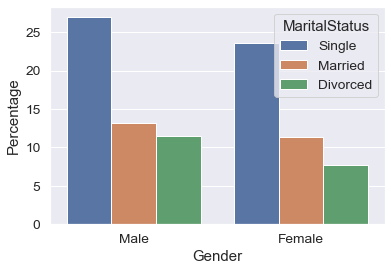

In [89]:
attrition_percentage_dict={}
for index,row in total_count_per_gender_marital_status.iterrows():
    for index2,row2 in data_attrition_by_gender_marital_status.iterrows():
        if(row['Gender']==row2['Gender'] and row['MaritalStatus']==row2['MaritalStatus']):
            attrition_percent=(row2['Count']/row['Count'])*100
    if(not attrition_percentage_dict):
        attrition_percentage_dict.update({'Gender':[row['Gender']],'MaritalStatus':[row['MaritalStatus']],'Percentage':[attrition_percent]})
    else:
        attrition_percentage_dict['Gender'].append(row['Gender'])
        attrition_percentage_dict['MaritalStatus'].append(row['MaritalStatus'])
        attrition_percentage_dict['Percentage'].append(attrition_percent)

attrition_percentage_per_gender_marital_status = pd.DataFrame(data=attrition_percentage_dict)    
attrition_percentage_per_gender_marital_status = attrition_percentage_per_gender_marital_status.sort_values(['Percentage'],ascending=[False])
print(attrition_percentage_per_gender_marital_status)

fig = plt.figure()
h = sns.barplot(data=attrition_percentage_per_gender_marital_status,x='Gender',y='Percentage',hue='MaritalStatus')

#### Insight - So even when we checked the proportion at gender-marital status level , we find that Single males had highest proportion of attrition closely followed by Single Females

# 6. Lets see the Age factor 

### a. Lets see the distribution of Age from the entire data set 

   index          Age
0  count  2940.000000
1   mean    36.923810
2    std     9.133819
3    min    18.000000
4    25%    30.000000
5    50%    36.000000
6    75%    43.000000
7    max    60.000000


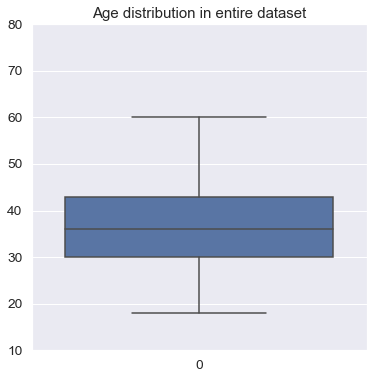

In [90]:
fig = plt.figure(figsize=(6,6))
h = sns.boxplot(data=TotalData['Age'])
plt.ylim(10,80)
plt.title("Age distribution in entire dataset")

print(TotalData['Age'].describe().reset_index())

#### Insight - From the age range distribution and five number summary we can confirm that there are employees as young as 18 and as old as 60 in the entire dataset

#### Insight - Median age of the employees is 36 

### b. Now Lets look at the distribution of age in the subset where Attrition has happened

   index         Age
0  count  474.000000
1   mean   33.607595
2    std    9.679102
3    min   18.000000
4    25%   28.000000
5    50%   32.000000
6    75%   39.000000
7    max   58.000000


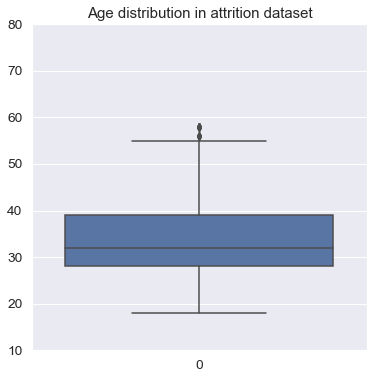

In [91]:
fig = plt.figure(figsize=(6,6))
h = sns.boxplot(data=data_attrition['Age'])
plt.ylim(10,80)
plt.title("Age distribution in attrition dataset")

print(data_attrition['Age'].describe().reset_index())

#### Insight - From the age range distribution and five number summary we can confirm that there are employees as young as 18 and as old as 58 in the subset where attrition has happened

#### Insight - Median age of the employees who left in attrition is 32 

# 7. Lets see the attrition in another light - Age and JobLevel

### a. Lets see the distribution of Age for every Job Level

Text(0.5, 1.0, 'Age distribution per job level from attriton dataset ')

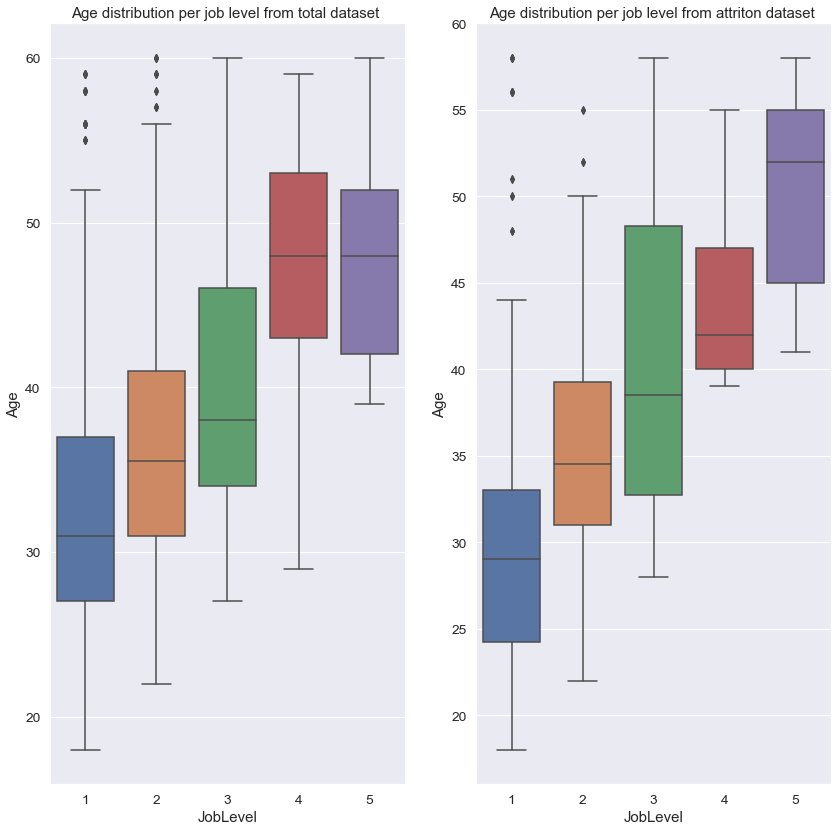

In [92]:
f, axes = plt.subplots(1,2,figsize=(14,14))

g = sns.boxplot(data=TotalData,x='JobLevel',y='Age',ax=axes[0])
axes[0].set_title("Age distribution per job level from total dataset ")

g = sns.boxplot(data=data_attrition,x='JobLevel',y='Age',ax=axes[1] )
axes[1].set_title("Age distribution per job level from attriton dataset ")

#### Insight a - From the above box plots we can confirm that Lowest Job Level 1 has the youngest employees . Its IQR range or 68% data is youngest amongst the four job levels closely followed by that of Job Level 2
#### Insight b - From the attrition data set (right hand side) we can also see  that young experienced people are most likely to leave the job as because we have already seen above that Job Level 1 is the most highly affected level in attrition and also have seen that median age of people who had left the job is 32

# 8. Lets see the attrition in another light - Age and JobLevel

### a. Lets see the distribution Age for every Marital Status

Text(0.5, 1.0, 'Age distribution per marital status from attriton dataset ')

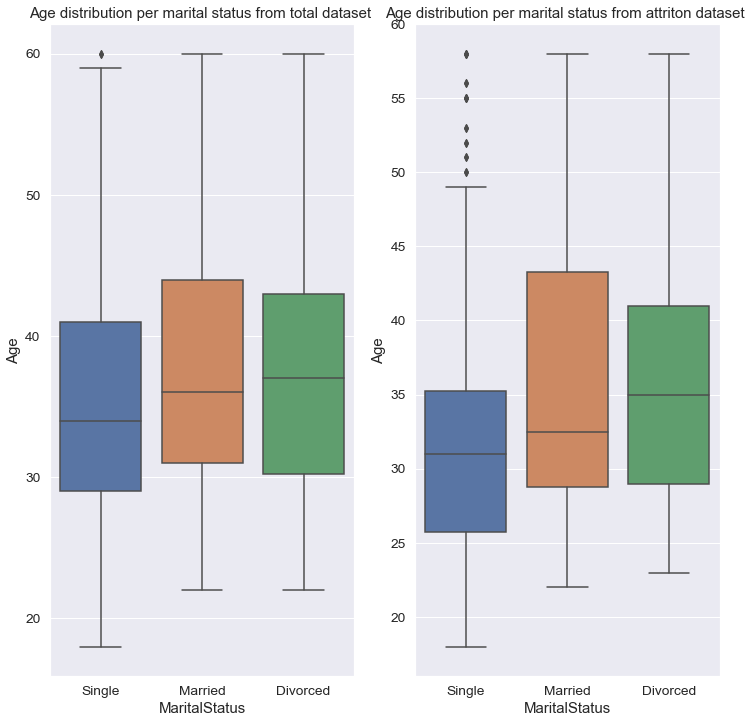

In [93]:

f, axes = plt.subplots(1,2,figsize=(12,12))

g = sns.boxplot(data=TotalData,x='MaritalStatus',y='Age',ax=axes[0])
axes[0].set_title("Age distribution per marital status from total dataset ")

g = sns.boxplot(data=data_attrition,x='MaritalStatus',y='Age',ax=axes[1] )
axes[1].set_title("Age distribution per marital status from attriton dataset ")

#### Insight a - Single Status has relatively lower age range in both the data sets 

#### Insight b - We can also verify from the second graph that Single people have almost the same age range as that of Job Level 1 in the attrition data set . So this again , reiterates the fact that we saw earlier that Single people are more likely to leave the job than married or divorced people .

# 9. Monthly Income factor on attrition

### a. Lets look at the MonthlyIncome distribution first from the entire dataset

   index  MonthlyIncome
0  count    2940.000000
1   mean    6502.931293
2    std    4707.155770
3    min    1009.000000
4    25%    2911.000000
5    50%    4919.000000
6    75%    8380.000000
7    max   19999.000000


Text(0.5, 1.0, 'Monthly income distribution in total dataset')

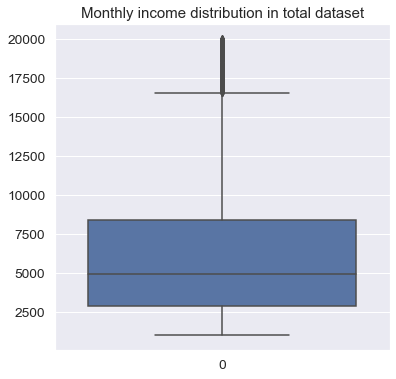

In [94]:
print(TotalData['MonthlyIncome'].describe().reset_index())
fig = plt.figure(figsize=(6,6))
h = sns.boxplot(data=TotalData['MonthlyIncome'])
plt.title("Monthly income distribution in total dataset")

### b. Lets look at the MonthlyIncome distribution first from the subset where attrition has happened

   index  MonthlyIncome
0  count     474.000000
1   mean    4787.092827
2    std    3636.360329
3    min    1009.000000
4    25%    2373.000000
5    50%    3202.000000
6    75%    5916.000000
7    max   19859.000000


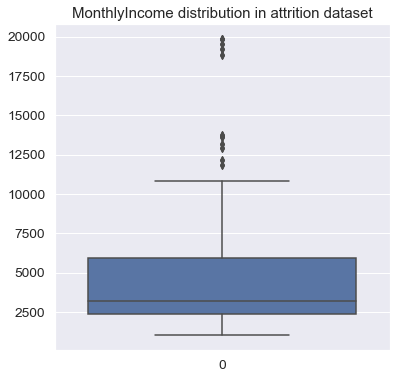

In [95]:
fig = plt.figure(figsize=(6,6))
h = sns.boxplot(data=data_attrition['MonthlyIncome'])
plt.title("MonthlyIncome distribution in attrition dataset")

print(data_attrition['MonthlyIncome'].describe().reset_index())

#### Insight - So from the above two MonthlyIncome distribution we can see that the median salary from the total data set is 4919 whereas the median MonthlyIncome in the attrition dataset is significantly less with a score of 3202 .So basically according to the distribution it seems people who left in the attrition had lower payscale 

# 10. Let us first try to understand if lower job levels are less paid.

### a. Lets see how monthly income is distributed across JobLevels from the total dataset to have an idea if Lower Job Levels are very low paying

Text(0.5, 1.0, 'Monthly income distribution in total dataset for every job level')

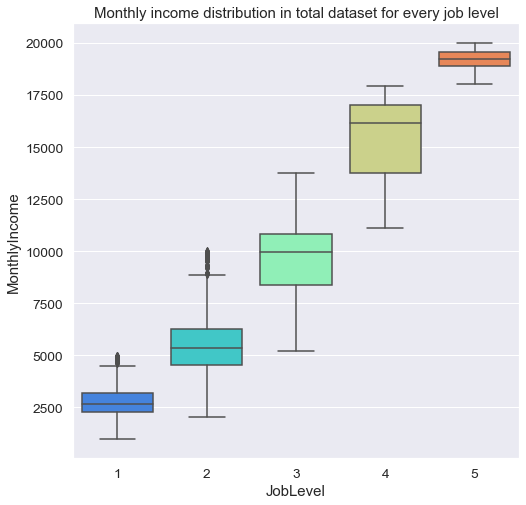

In [96]:
fig = plt.figure(figsize=(8,8))
h = sns.boxplot(data=TotalData,x='JobLevel',y='MonthlyIncome',palette='rainbow')
plt.title("Monthly income distribution in total dataset for every job level")

#### Insight - So we can see from the distribution above that MonthlyIncome is lowest in JobLevel 1 . As the JobLevel increases the MonthlyIncome also moves up.

### Key Insight 1- Lower JobLevel means low income but not employees from the lower job levels left during attrition as we have also seen that people from higher job levels left as well . So even though low MonthlyIncome is one key which suggests people leaving but we need to understand more and see if there is more than what is obvious.

# 11. We have also established the fact amongst the people who left the median age is 32 . That suggests people with some work experience had left . So we need to focus on why drove these young experienced people to leave.  

### a. Let us first create a column in the attrition subset with Age ranges

<ipython-input-97-fa7d0f99a15d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attrition['AgeRange'] = pd.cut(data_attrition['Age'], bins=[0, 29, 32, 34,36,38,40,42,44])


Text(0.5, 1.0, 'AgeRange counts in the sub set where data attrition is Yes ')

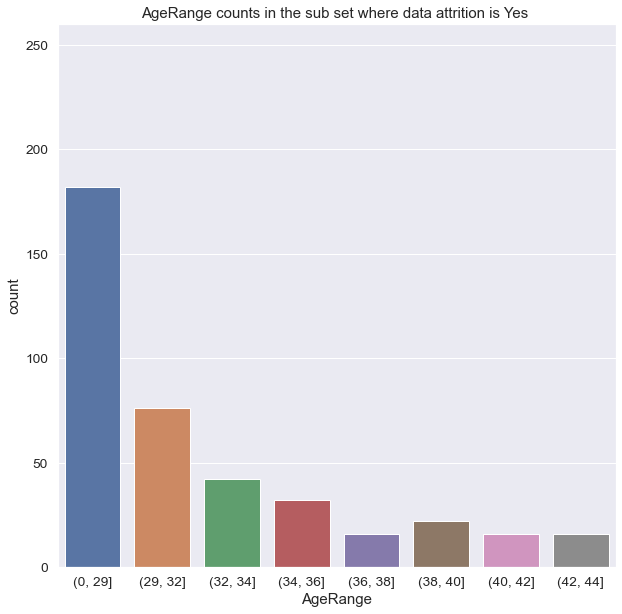

In [97]:
data_attrition['AgeRange'] = pd.cut(data_attrition['Age'], bins=[0, 29, 32, 34,36,38,40,42,44])
data_attrition_age_range_count = data_attrition.groupby(['AgeRange'])['EmployeeNumber'].agg(Count='count').reset_index()
data_attrition_age_range_count

fig = plt.figure(figsize=(10,10))
h = sns.countplot(data=data_attrition,x='AgeRange')
plt.ylim(0,260)
plt.title("AgeRange counts in the sub set where data attrition is Yes ")

#### Insight 1 - So we see that amongst the people who left , people aged less than equals to 32 , left the most . This again reconfirms the earlier conclusion which we drew from the describe method which informed us that the median age of leaving the job is 32 .

### b. From the attrition subset , Lets look at the total career experience and experience with this company for these people aged less than equals to 32 and see if we can find some pain points for these employees which forced them to make the decision to quit the job

In [98]:
tmp_data = data_attrition.loc[ (data_attrition['Age']<=32),['TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','Attrition']]

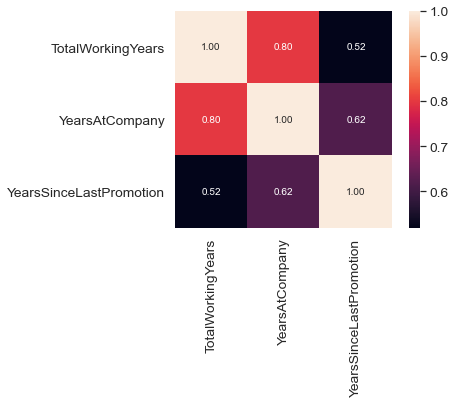

In [99]:
cm = tmp_data.corr()#np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cm.columns.values,xticklabels=cm.columns.values)

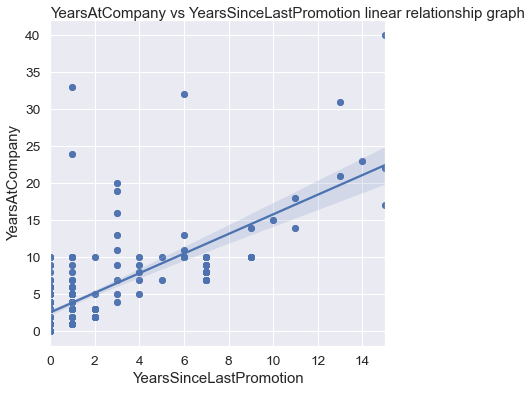

In [100]:
fig = plt.figure(figsize=(6,6))

plt.title("YearsAtCompany vs YearsSinceLastPromotion linear relationship graph",loc='left',pad=2.0)

g = sns.regplot(data=data_attrition,x='YearsSinceLastPromotion',y='YearsAtCompany')


#### Insight 1 - There is positive linear relationship between YearsSinceLastPromotion and YearsAtCompany variables with a coeff score of 0.62 which suggests an almost strong correlation .

#### Insight 2 - From the attrition subset , for those people aged less than or equals to 32 - who left the organization most in count, we can deduce one of their painpoints from the above graph that their roles remained stagnant over the years while serving the company . We can say their efforts were unnoticed or in other words they were not able to grow in the company. 

# 12. Why were they getting stagnated at their roles ? Was it performance issue?
### a. Lets have look at their variables PerformanceRating

    AgeRange  PerformanceRating  Count
0    (0, 29]                  3    158
1    (0, 29]                  4     24
2   (29, 32]                  3     66
3   (29, 32]                  4     10
4   (32, 34]                  3     28
5   (32, 34]                  4     14
6   (34, 36]                  3     24
7   (34, 36]                  4      8
8   (36, 38]                  3     14
9   (36, 38]                  4      2
10  (38, 40]                  3     18
11  (38, 40]                  4      4
12  (40, 42]                  3     14
13  (40, 42]                  4      2
14  (42, 44]                  3     14
15  (42, 44]                  4      2


Text(0.5, 1.0, 'Performance Rating per AgeRange counts in the the sub set where data attrition has happened')

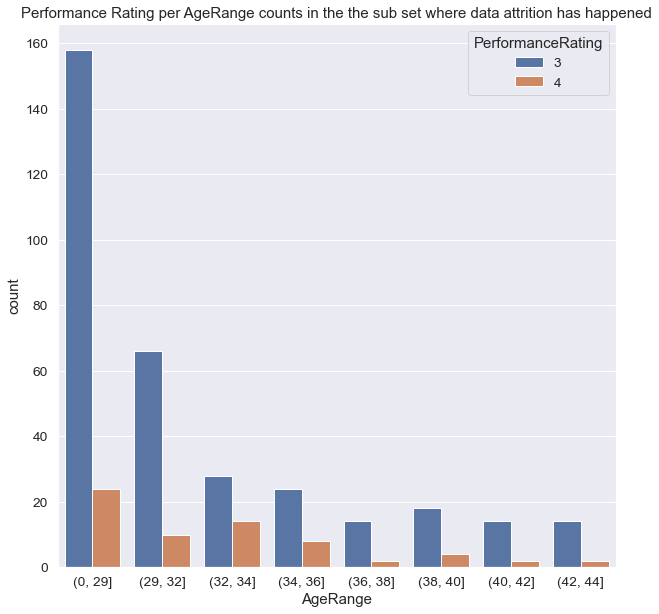

In [101]:
data_attrition_age_range_rating_count = data_attrition.groupby(['AgeRange','PerformanceRating'])['EmployeeNumber'].agg(Count='count').reset_index()
print(data_attrition_age_range_rating_count)

fig = plt.figure(figsize=(10,10))
h = sns.countplot(data=data_attrition,x='AgeRange',hue='PerformanceRating')
plt.title("Performance Rating per AgeRange counts in the the sub set where data attrition has happened")

#### Insight 1 - From the attrition subset , in all the age ranges lower rating of 3 are higher in count
#### Insight 2 - From the attrition subset , for those people aged less than or equals to 32 (who left the organization most in count), we can deduce lower rating of 3 were far higher in count than people from other age ranges .

# 13. Lets also see how the job involvement of these people were ,so that we can understand were they justifiably given wrong rating due to poor involvement or did the employees feel let down because they didnt get their fair share of visibility and recognition despite high job involvement ?

    AgeRange  JobLevel  Count
0    (0, 29]         1    158
1    (0, 29]         2     16
2    (0, 29]         3      8
3    (0, 29]         4      0
4    (0, 29]         5      0
5   (29, 32]         1     46
6   (29, 32]         2     22
7   (29, 32]         3      8
8   (29, 32]         4      0
9   (29, 32]         5      0
10  (32, 34]         1     22
11  (32, 34]         2     14
12  (32, 34]         3      6
13  (32, 34]         4      0
14  (32, 34]         5      0
15  (34, 36]         1     12
16  (34, 36]         2     14
17  (34, 36]         3      6
18  (34, 36]         4      0
19  (34, 36]         5      0
20  (36, 38]         1      4
21  (36, 38]         2      8
22  (36, 38]         3      4
23  (36, 38]         4      0
24  (36, 38]         5      0
25  (38, 40]         1     10
26  (38, 40]         2      6
27  (38, 40]         3      2
28  (38, 40]         4      4
29  (38, 40]         5      0
30  (40, 42]         1      8
31  (40, 42]         2      4
32  (40, 4

Text(0.5, 1.0, 'JobInvolvement per AgeRange counts in the the sub set where data attrition is Yes')

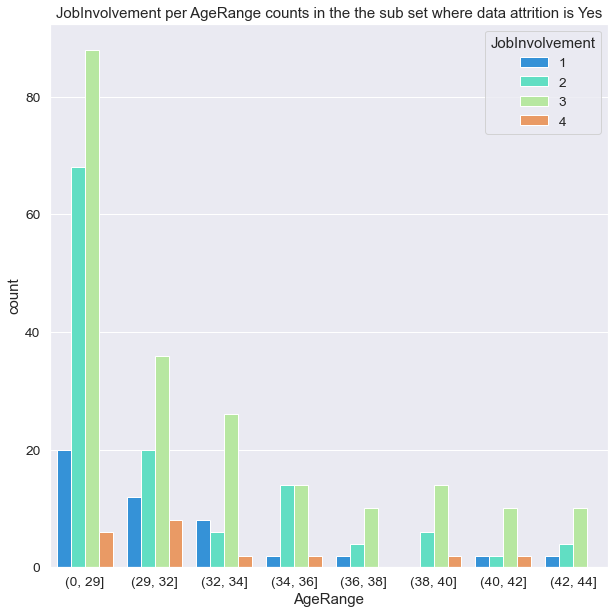

In [102]:
data_attrition_age_range_job_level = data_attrition.groupby(['AgeRange','JobLevel'])['EmployeeNumber'].agg(Count='count').reset_index()
print(data_attrition_age_range_job_level)

fig = plt.figure(figsize=(10,10))
h = sns.countplot(data=data_attrition,x='AgeRange',hue='JobInvolvement',palette='rainbow')
plt.title("JobInvolvement per AgeRange counts in the the sub set where data attrition is Yes")

#### Insight 1 - From the attrition subset , for all age ranges JobInvolvement rating of 3 followed by 2 are in higher counts . So basically ,  job involvement was good across all age ranges.

#### Insight 2 - From the attrition subset , For those people aged  less than equals to 32 i.e who left the organization most in count had valid reason to feel let down by the organization as even they had a lot of involvement in their respective jobs but didnt get good recognition for that as we have seen from earlier charts on their performance ratings

# 14. How satisfied were the outgoing associates with the work environment ? 

Text(0.5, 1.0, 'Count of environment rating for JobLevel from attriton subset')

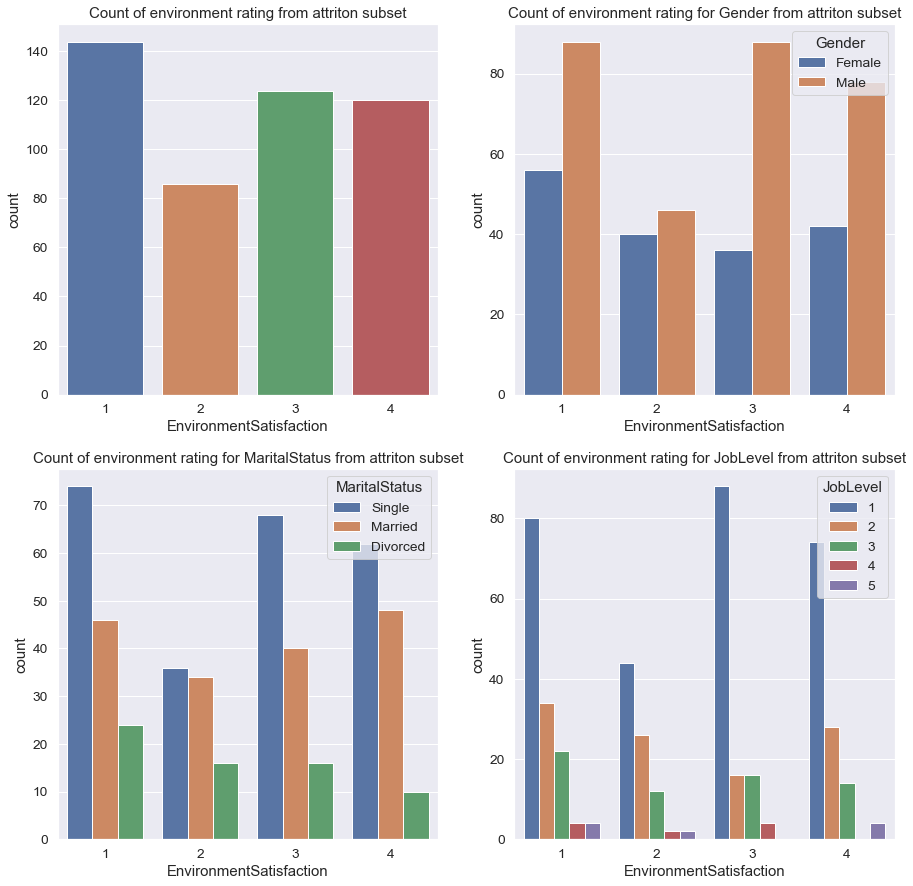

In [103]:
f, axes = plt.subplots(2,2,figsize=(15,15))

g = sns.countplot(data=data_attrition,x='EnvironmentSatisfaction',ax=axes[0,0])
axes[0,0].set_title("Count of environment rating from attriton subset")

g = sns.countplot(data=data_attrition,x='EnvironmentSatisfaction',hue='Gender',ax=axes[0,1])

axes[0,1].legend(title='Gender',loc="upper right")
axes[0,1].set_title("Count of environment rating for Gender from attriton subset")

g = sns.countplot(data=data_attrition,x='EnvironmentSatisfaction',hue='MaritalStatus',ax=axes[1,0])

axes[1,0].legend(title='MaritalStatus',loc="upper right")
axes[1,0].set_title("Count of environment rating for MaritalStatus from attriton subset")

g = sns.countplot(data=data_attrition,x='EnvironmentSatisfaction',hue='JobLevel',ax=axes[1,1])

axes[1,1].legend(title='JobLevel',loc="upper right")
axes[1,1].set_title("Count of environment rating for JobLevel from attriton subset")



#### Insight1 - The first plot tell us that the lowest environment satisfaction rating has the highest spike . That means most of the people who had left the company were not pleased with the environment at the workplace .But that being said many were very happy with the environment as the environment satisfaction 3 and 4 also have high counts.   

#### Insight 2 - When we compare the Gender and Marital Status we find that the lowest environment satisfaction was amongst Single Male and Females (even though were also Single males and female who had higher environment satisfaction) .

#### Insight 3 - Even when we look at JobLevel , even lower Job levels have high environment satisfaction rating . 

#### Insight 4 - So this tells us that environment may not have been a big reason for people to leave the company 

# 15. For the people who had left in the attrition , were they offered with good stock option level ?

Text(0.5, 1.0, 'Count of StockOptionLevel for MaritalStatus from attriton subset')

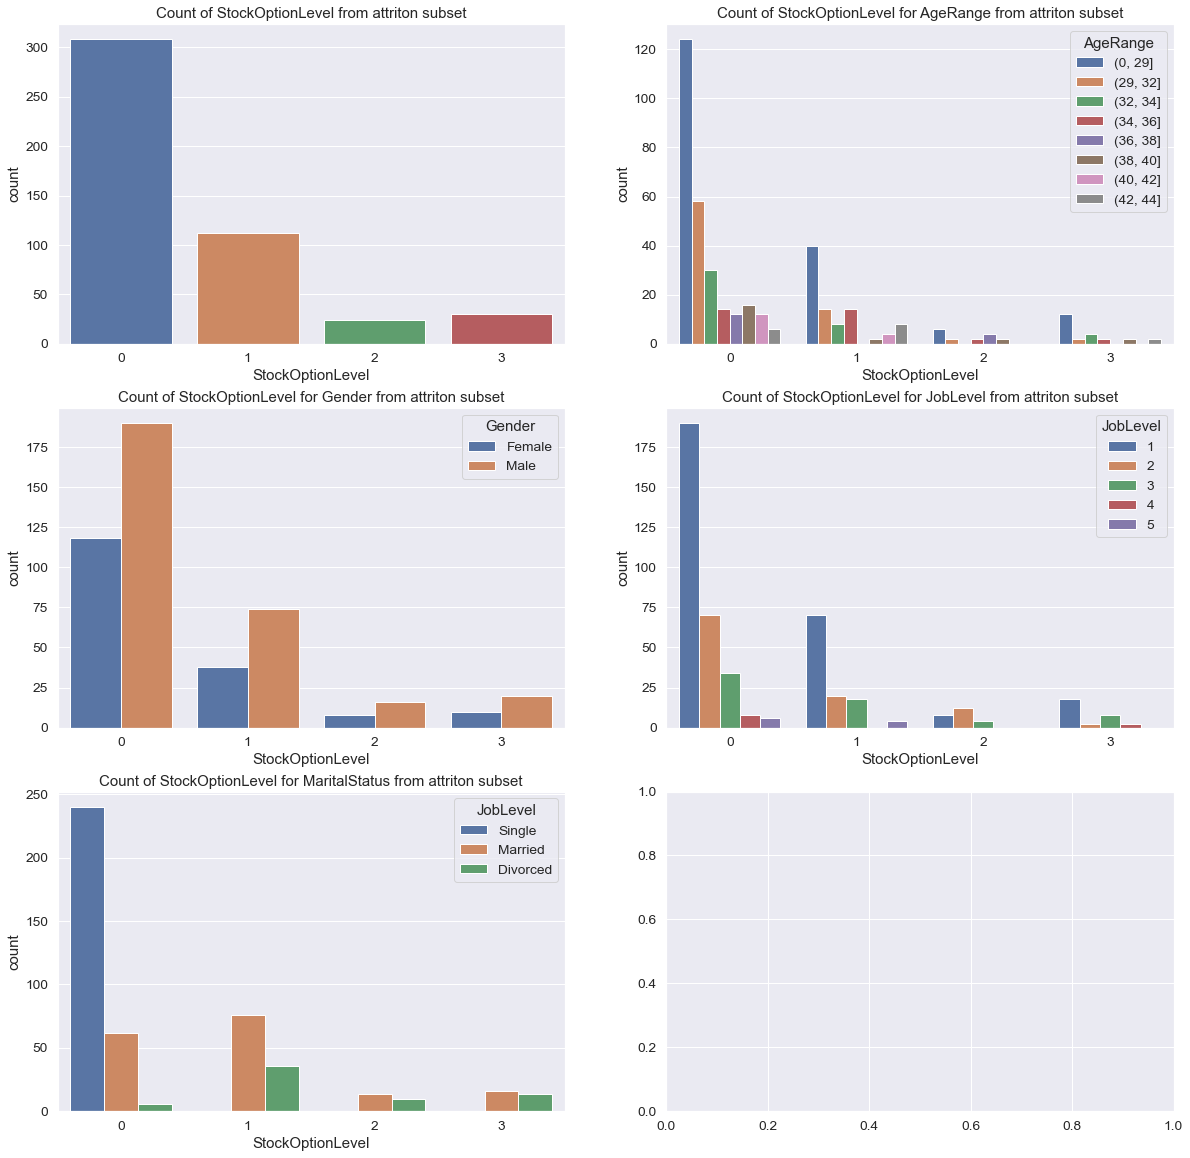

In [104]:
f, axes = plt.subplots(3,2,figsize=(20,20))

g = sns.countplot(data=data_attrition,x='StockOptionLevel',ax=axes[0,0])
axes[0,0].set_title("Count of StockOptionLevel from attriton subset")

g = sns.countplot(data=data_attrition,x='StockOptionLevel',hue='AgeRange',ax=axes[0,1] )

axes[0,1].legend(title='AgeRange',loc="upper right")
axes[0,1].set_title("Count of StockOptionLevel for AgeRange from attriton subset")

g = sns.countplot(data=data_attrition,x='StockOptionLevel',hue='Gender',ax=axes[1,0])

axes[1,0].legend(title='Gender',loc="upper right")
axes[1,0].set_title("Count of StockOptionLevel for Gender from attriton subset")

g = sns.countplot(data=data_attrition,x='StockOptionLevel',hue='JobLevel',ax=axes[1,1])

axes[1,1].legend(title='JobLevel',loc="upper right")
axes[1,1].set_title("Count of StockOptionLevel for JobLevel from attriton subset")

g = sns.countplot(data=data_attrition,x='StockOptionLevel',hue='MaritalStatus',ax=axes[2,0])

axes[2,0].legend(title='JobLevel',loc="upper right")
axes[2,0].set_title("Count of StockOptionLevel for MaritalStatus from attriton subset")



#### Insight 1 - The first plot tells us that people who had left , had very poor stock options with most of them having no stock options at all . 
#### Insight 2 - Stock options were poorest for people aging less than equals to 32 and stuck at lower job levels as the people in this range had the tallest spike in Level 0 and Level 1 option which means next to no stock options . 
#### Insight 3 - We can also see its the Single male and Women who were having the poorest stock options .

# 16. Lets look at the Business Travel Opportunities which the outgoing employees had 

Text(0.5, 1.0, 'Count of BusinessTravel for every MaritalStatus from attriton subset')

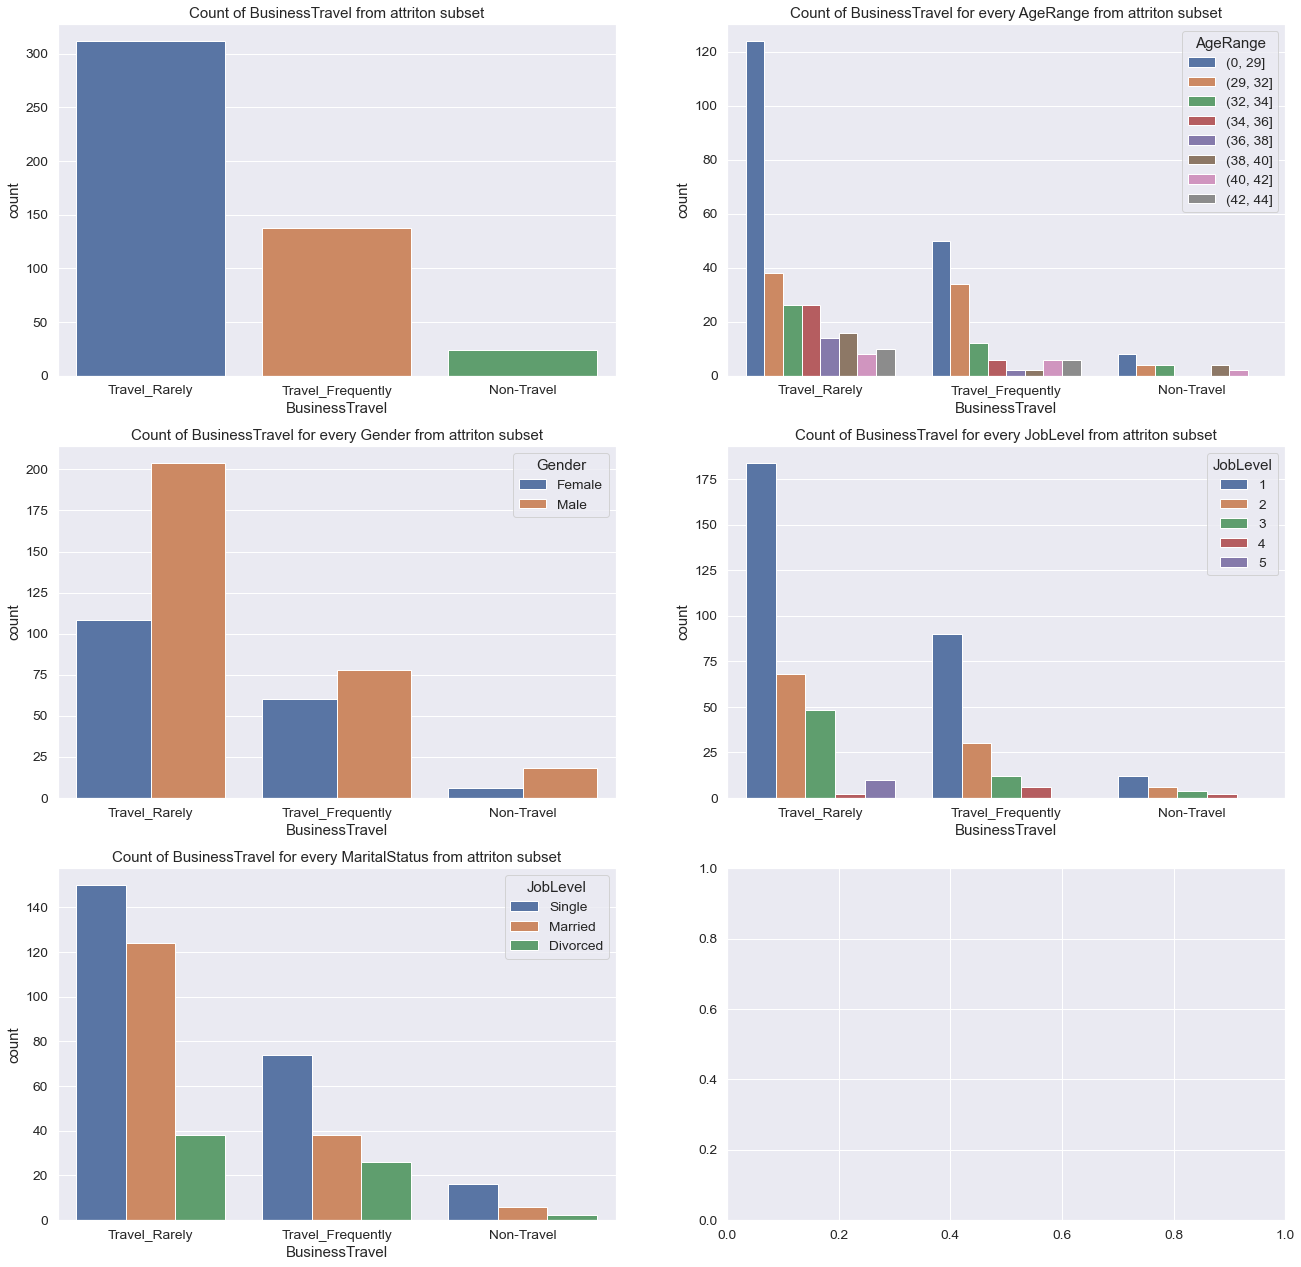

In [105]:
#Business Travel opportunities ?

f, axes = plt.subplots(3,2,figsize=(22,22))

g = sns.countplot(data=data_attrition,x='BusinessTravel',ax=axes[0,0])
axes[0,0].set_title("Count of BusinessTravel from attriton subset")

g = sns.countplot(data=data_attrition,x='BusinessTravel',hue='AgeRange',ax=axes[0,1])

axes[0,1].legend(title='AgeRange',loc="upper right")
axes[0,1].set_title("Count of BusinessTravel for every AgeRange from attriton subset")

g = sns.countplot(data=data_attrition,x='BusinessTravel',hue='Gender',ax=axes[1,0])

axes[1,0].legend(title='Gender',loc="upper right")
axes[1,0].set_title("Count of BusinessTravel for every Gender from attriton subset")

g = sns.countplot(data=data_attrition,x='BusinessTravel',hue='JobLevel',ax=axes[1,1])

axes[1,1].legend(title='JobLevel',loc="upper right")
axes[1,1].set_title("Count of BusinessTravel for every JobLevel from attriton subset")

g = sns.countplot(data=data_attrition,x='BusinessTravel',hue='MaritalStatus',ax=axes[2,0])

axes[2,0].legend(title='JobLevel',loc="upper right")
axes[2,0].set_title("Count of BusinessTravel for every MaritalStatus from attriton subset")


#### Insight 1 - The first graph confirms that people who left in attrition , most of them had to travel rarely . 
#### Insight 2 - Amongst them mostly were Single males aging either lower than or equals to 32 , closely followed by Single Females of the same age range - stuck in lower job levels 

# 17. How was their WorkLife Balance ? 

Text(0.5, 1.0, 'Count of WorkLifeBalance for every MaritalStatus from attriton subset')

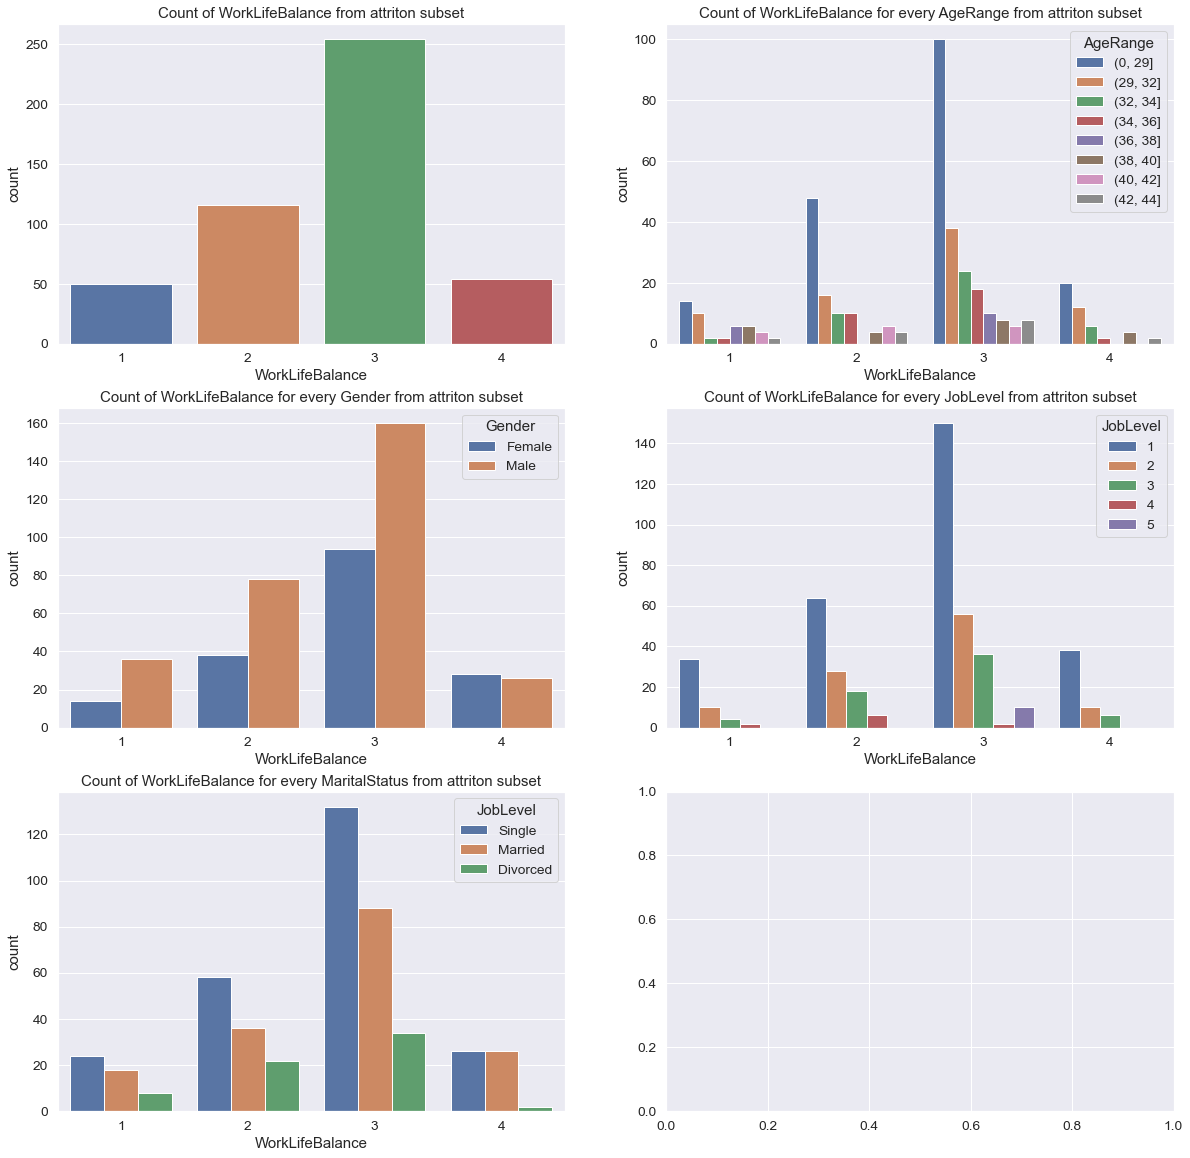

In [106]:
f, axes = plt.subplots(3,2,figsize=(20,20))

g = sns.countplot(data=data_attrition,x='WorkLifeBalance',ax=axes[0,0])
axes[0,0].set_title("Count of WorkLifeBalance from attriton subset")

g = sns.countplot(data=data_attrition,x='WorkLifeBalance',hue='AgeRange',ax=axes[0,1])

axes[0,1].legend(title='AgeRange',loc="upper right")
axes[0,1].set_title("Count of WorkLifeBalance for every AgeRange from attriton subset")

g = sns.countplot(data=data_attrition,x='WorkLifeBalance',hue='Gender',ax=axes[1,0])

axes[1,0].legend(title='Gender',loc="upper right")
axes[1,0].set_title("Count of WorkLifeBalance for every Gender from attriton subset")

g = sns.countplot(data=data_attrition,x='WorkLifeBalance',hue='JobLevel',ax=axes[1,1])

axes[1,1].legend(title='JobLevel',loc="upper right")
axes[1,1].set_title("Count of WorkLifeBalance for every JobLevel from attriton subset")

g = sns.countplot(data=data_attrition,x='WorkLifeBalance',hue='MaritalStatus',ax=axes[2,0])

axes[2,0].legend(title='JobLevel',loc="upper right")
axes[2,0].set_title("Count of WorkLifeBalance for every MaritalStatus from attriton subset")

#### Insight - WorkLife Balance seemed to be mostly good in all the dimensions 

# 18. Lets look at DistanceFromHome factor

In [107]:
data_attrition['DistanceFromHome'].describe()

count    474.000000
mean      10.632911
std        8.443586
min        1.000000
25%        3.000000
50%        9.000000
75%       17.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [108]:
TotalData.loc[TotalData['Attrition']=='No','DistanceFromHome'].describe()

count    2466.000000
mean        8.915653
std         8.011008
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

#### Insight - From the above descriptions we can also see that mean distance from home was little higher for the people who quit the company

# 19. Lets look if we can see what Education and Education Field tells us ? Are highly educated people from certain field more likely to leave ?

In [109]:
total_count_per_education_edufield = TotalData.groupby(['Education','EducationField'])['EmployeeNumber'].agg(Count='count').reset_index()
total_count_per_education_edufield = total_count_per_education_edufield.sort_values(['Count'],ascending=[False])
print(total_count_per_education_edufield)

    Education    EducationField  Count
13          3     Life Sciences    466
15          3           Medical    366
19          4     Life Sciences    346
7           2     Life Sciences    232
21          4           Medical    208
9           2           Medical    198
1           1     Life Sciences    134
3           1           Medical    126
14          3         Marketing    118
17          3  Technical Degree    114
20          4         Marketing    104
22          4             Other     66
23          4  Technical Degree     62
8           2         Marketing     48
16          3             Other     48
11          2  Technical Degree     44
5           1  Technical Degree     38
10          2             Other     38
25          5     Life Sciences     34
12          3   Human Resources     32
27          5           Medical     30
2           1         Marketing     28
26          5         Marketing     20
18          4   Human Resources     10
4           1            

    Education    EducationField  Count
0           3     Life Sciences     74
2           3           Medical     50
1           4     Life Sciences     50
3           2     Life Sciences     36
4           3  Technical Degree     32
5           3         Marketing     30
6           2           Medical     30
7           4           Medical     26
8           1           Medical     20
9           4         Marketing     18
10          1     Life Sciences     16
12          1  Technical Degree     12
13          4             Other     12
11          2         Marketing     12
14          2  Technical Degree      8
15          3   Human Resources      8
16          4  Technical Degree      8
17          1         Marketing      8
18          5  Technical Degree      4
19          3             Other      4
20          1             Other      4
21          4   Human Resources      2
22          2             Other      2
23          5   Human Resources      2
24          5     Life Sc

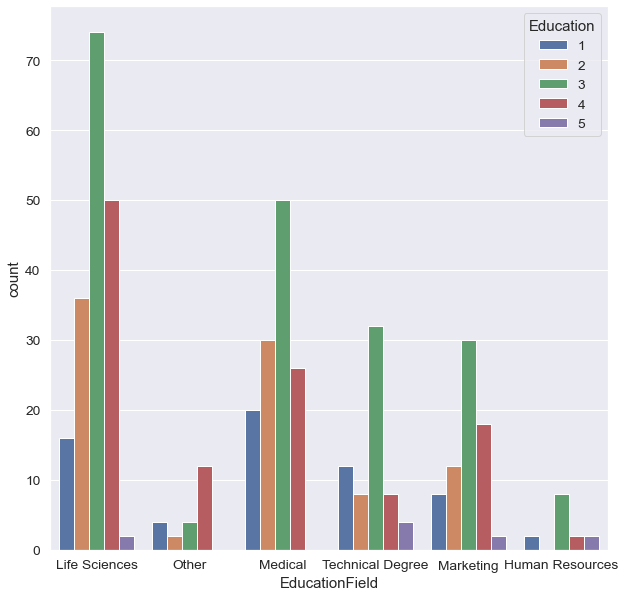

In [110]:
data_attrition_per_education_edufield = data_attrition[['Education','EducationField']].value_counts().reset_index()
data_attrition_per_education_edufield.rename(columns={0:'Count'},inplace=True)
data_attrition_per_education_edufield  = data_attrition_per_education_edufield.sort_values(['Count'],ascending=[False])
print(data_attrition_per_education_edufield )

fig = plt.figure(figsize=(10,10))
h = sns.countplot(data=data_attrition,x='EducationField',hue='Education')

    Education    EducationField  Percentage
25          5  Technical Degree   66.666667
16          1  Technical Degree   31.578947
9           3  Technical Degree   28.070175
15          2  Technical Degree   18.181818
12          4  Technical Degree   12.903226
29          5             Other   50.000000
24          1             Other   40.000000
11          4             Other   18.181818
14          3             Other    8.333333
17          2             Other    5.263158
20          5           Medical   25.000000
7           1           Medical   15.873016
5           2           Medical   15.151515
1           3           Medical   13.661202
4           4           Medical   12.500000
21          1         Marketing   28.571429
8           3         Marketing   25.423729
13          2         Marketing   25.000000
10          4         Marketing   17.307692
22          5         Marketing   10.000000
0           3     Life Sciences   15.879828
3           2     Life Sciences 

Text(0.5, 1.0, 'Attribution count per Education for every EducationField')

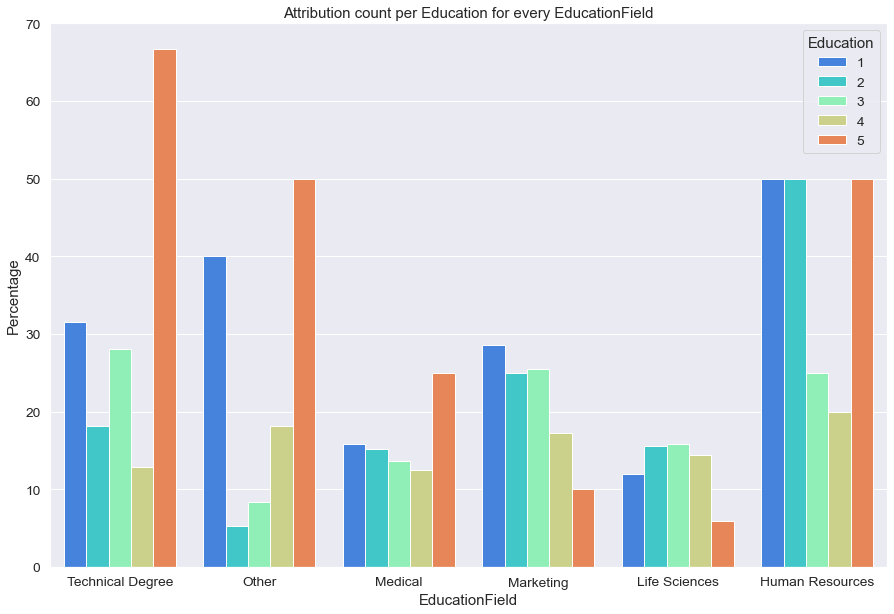

In [111]:
attrition_percentage_dict={}
for index,row in total_count_per_education_edufield.iterrows():
    for index2,row2 in data_attrition_per_education_edufield.iterrows():
        if(row['Education']==row2['Education'] and row['EducationField']==row2['EducationField']):
            attrition_percent=(row2['Count']/row['Count'])*100
    if(not attrition_percentage_dict):
        attrition_percentage_dict.update({'Education':[row['Education']],'EducationField':[row['EducationField']],'Percentage':[attrition_percent]})
    else:
        attrition_percentage_dict['Education'].append(row['Education'])
        attrition_percentage_dict['EducationField'].append(row['EducationField'])
        attrition_percentage_dict['Percentage'].append(attrition_percent)

attrition_percentage_per_dept_joblevel = pd.DataFrame(data=attrition_percentage_dict)    
attrition_percentage_per_dept_joblevel = attrition_percentage_per_dept_joblevel.sort_values(['EducationField','Percentage'],ascending=[False,False])
print(attrition_percentage_per_dept_joblevel)


fig = plt.figure(figsize=(15,10))
h = sns.barplot(data=attrition_percentage_per_dept_joblevel,x='EducationField',y='Percentage',hue='Education',palette='rainbow')
plt.title("Attribution count per Education for every EducationField")

#### Insight - Highly educated people with technical degree are most likely to quit 

# 20. SUGGESTION TO THE HR 

## Suggestion 1 - To make sure that to ensure experienced professionals with quality technical education, who have given time ,effort and engagement to the company are rewarded well with good ratings so that they get timely promotions to grow into higher joblevels with better paychecks and then they will tend to stay back . 
## Suggestion 2 - Suggest the management to start by looking in their own department HR first as they have highest percentage of attrition .
## Suggestion 3 - Introspect and look for ways to improve the work environment in the company as many outgoing associates had poor environment rating.

# DATA CLEANING

## Zero Variance Check

Now First we will try to get the columns where variance is 0.
For that we will use the nunique() method to figure out if no of unique values in a column is 1 . If so that means that column has same value in every record and we will drop that column  

In [112]:
cols_to_be_dropped = []
for column in list(TotalData.columns):
    if(TotalData[column].nunique()==1):
        cols_to_be_dropped.append(column)
    
print(cols_to_be_dropped)    
TotalData.drop(columns=cols_to_be_dropped,inplace=True)

['EmployeeCount', 'Over18', 'StandardHours']


## Null Value Check
Now lets check for null or nan values and if any column has more than 30% of null values lets drop those columns 

In [113]:
TotalData.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [114]:
TotalData.nunique()==2

Age                         False
Attrition                    True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                     True
PercentSalaryHike           False
PerformanceRating            True
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrent

### So as we can see from above there are no such columns where there are null values at all . So no columns need to be dropped

## Now lets check for outliers in numeric and continuous columns

We cant look for outliers in categorical or categorical-ordinal data as that wont make sense .So we will let them be

In [115]:
description_df_cont = TotalData[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].describe()
description_df_cont

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,20.325969,4707.155770,7116.575021,2.497584,3.659315,7.779458,1.289051,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [116]:
list(TotalData.columns)
list_cont_cols = list(description_df_cont.columns)
for col in list(TotalData.columns):
    for cont_col in list_cont_cols:
        if(col==cont_col):
            TotalData[col]=np.where(TotalData[col]>TotalData[col].quantile(0.75),TotalData[col].quantile(0.75),TotalData[col])
            TotalData[col]=np.where(TotalData[col]<TotalData[col].quantile(0.25),TotalData[col].quantile(0.25),TotalData[col])
TotalData.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.229932,806.478231,7.447619,2.912925,1470.500000,2.721769,66.030612,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,10.023810,2.542857,2.761224,5.842177,4.057143,1.220408,4.028571
std,5.232029,283.974994,4.787805,1.023991,848.849221,1.092896,14.675337,0.711440,1.106752,1.102658,...,0.360762,1.081025,0.851932,3.618425,0.498245,0.706356,2.511814,2.239671,1.212554,2.244467
min,30.000000,465.000000,2.000000,1.000000,1.000000,1.000000,48.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000
25%,30.000000,465.000000,2.000000,2.000000,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,43.000000,1157.000000,14.000000,5.000000,2940.000000,4.000000,84.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,15.000000,3.000000,4.000000,9.000000,7.000000,3.000000,7.000000


## Unnecessary column check

In [117]:
TotalData.drop(columns=['EmployeeNumber'],inplace=True)

## High Correlation Check

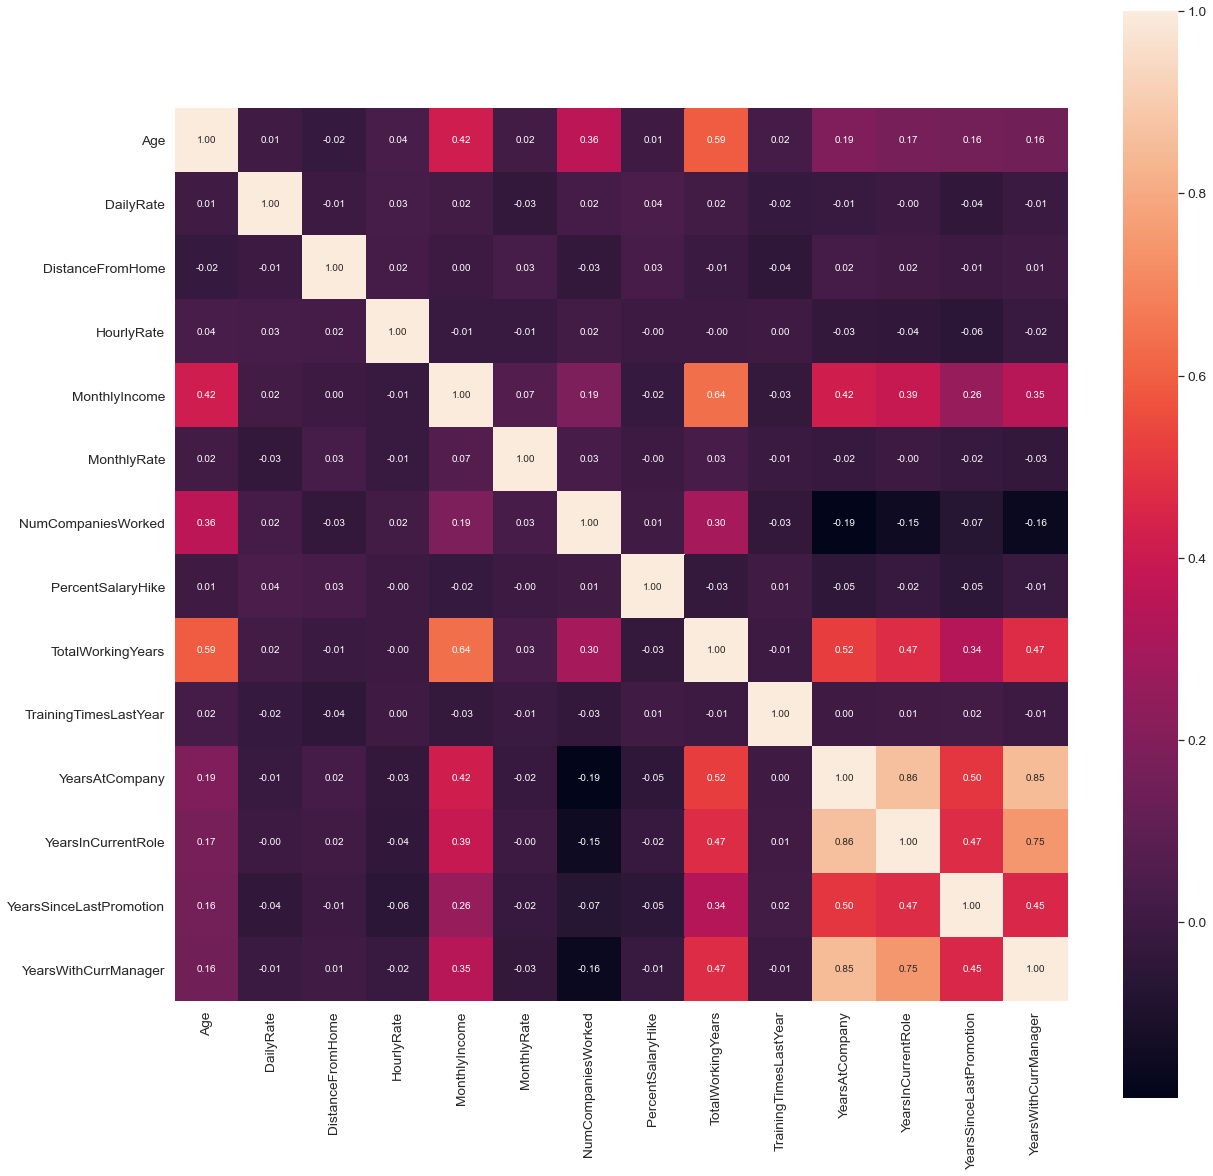

In [118]:
fig = plt.figure(figsize=(20,20))
cm = TotalData[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].corr()#np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cm.columns.values,xticklabels=cm.columns.values)

####  YearsAtCompany is very highly or twinly correlated to YearsInCurrentRole and YearsWithCurrManager with 0.86 and 0.85 as correlation coefficiant  score respectively
#### Also YearsInCurrentRole is highly correlated to YearsWithCurrManager with 0.75 as correlation coefficient score 

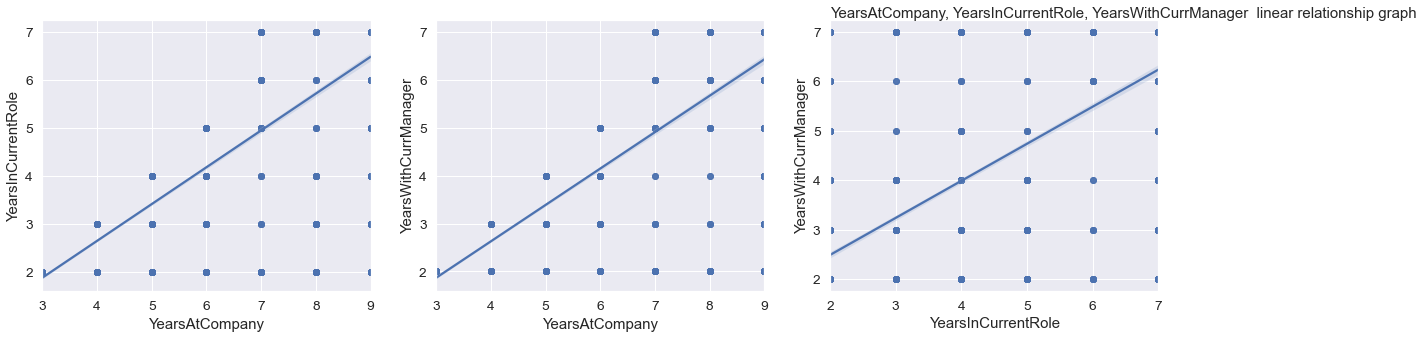

In [119]:
f, axes = plt.subplots(1,3,figsize=(20,5))

plt.title("YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager  linear relationship graph",loc='left',pad=2.0)

g = sns.regplot(data=TotalData,x='YearsAtCompany',y='YearsInCurrentRole',ax=axes[0])


g = sns.regplot(data=TotalData,x='YearsAtCompany',y='YearsWithCurrManager',ax=axes[1])

g = sns.regplot(data=TotalData,x='YearsInCurrentRole',y='YearsWithCurrManager',ax=axes[2])


## So Lets drop YearsWIthCurrManager and YearsInCurrentRole  as they are twin variables

In [120]:
TotalData.drop(columns=['YearsWithCurrManager','YearsInCurrentRole'],inplace=True)

In [121]:
print(TotalData.shape)
print("FINAL DATASET WHICH WE WILL USE FOR MODELLING")
TotalData.describe()


(2940, 29)
FINAL DATASET WHICH WE WILL USE FOR MODELLING


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.229932,806.478231,7.447619,2.912925,2.721769,66.030612,2.729932,2.063946,2.728571,5358.883673,...,2.227891,14.708844,3.153741,2.712245,0.793878,10.023810,2.542857,2.761224,5.842177,1.220408
std,5.232029,283.974994,4.787805,1.023991,1.092896,14.675337,0.711440,1.106752,1.102658,2175.901090,...,1.327249,2.406380,0.360762,1.081025,0.851932,3.618425,0.498245,0.706356,2.511814,1.212554
min,30.000000,465.000000,2.000000,1.000000,1.000000,48.000000,1.000000,1.000000,1.000000,2911.000000,...,1.000000,12.000000,3.000000,1.000000,0.000000,6.000000,2.000000,1.000000,3.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,...,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,3.000000
max,43.000000,1157.000000,14.000000,5.000000,4.000000,84.000000,4.000000,5.000000,4.000000,8380.000000,...,4.000000,18.000000,4.000000,4.000000,3.000000,15.000000,3.000000,4.000000,9.000000,3.000000


In [122]:
TotalData.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41.0,Yes,Travel_Rarely,1102.0,Sales,2.0,2,Life Sciences,2,Female,...,Yes,12.0,3,1,0,8.0,2.0,1,6.0,0.0
1,43.0,No,Travel_Frequently,465.0,Research & Development,8.0,1,Life Sciences,3,Male,...,No,18.0,4,4,1,10.0,3.0,3,9.0,1.0
2,37.0,Yes,Travel_Rarely,1157.0,Research & Development,2.0,2,Other,4,Male,...,Yes,15.0,3,2,0,7.0,3.0,3,3.0,0.0
3,33.0,No,Travel_Frequently,1157.0,Research & Development,3.0,4,Life Sciences,4,Female,...,Yes,12.0,3,3,0,8.0,3.0,3,8.0,3.0
4,30.0,No,Travel_Rarely,591.0,Research & Development,2.0,1,Medical,1,Male,...,No,12.0,3,4,1,6.0,3.0,3,3.0,2.0
5,32.0,No,Travel_Frequently,1005.0,Research & Development,2.0,2,Life Sciences,4,Male,...,No,13.0,3,3,0,8.0,2.0,2,7.0,3.0
6,43.0,No,Travel_Rarely,1157.0,Research & Development,3.0,3,Medical,3,Female,...,Yes,18.0,4,1,3,12.0,3.0,2,3.0,0.0
7,30.0,No,Travel_Rarely,1157.0,Research & Development,14.0,1,Life Sciences,4,Male,...,No,18.0,4,2,1,6.0,2.0,3,3.0,0.0
8,38.0,No,Travel_Frequently,465.0,Research & Development,14.0,3,Life Sciences,4,Male,...,No,18.0,4,2,0,10.0,2.0,3,9.0,1.0
9,36.0,No,Travel_Rarely,1157.0,Research & Development,14.0,3,Medical,3,Male,...,No,13.0,3,2,2,15.0,3.0,2,7.0,3.0


## Lets first convert the ordinal/categorical to numeric using encoding and then drop the original/categorical columns

In [123]:
def encode_data(TotalData):

    business_travel = pd.get_dummies(TotalData['BusinessTravel'],prefix='BusinessTravel')
    department = pd.get_dummies(TotalData['Department'],prefix='Department')
    education = pd.get_dummies(TotalData['Education'],prefix='Education')
    education_field = pd.get_dummies(TotalData['EducationField'],prefix='EducationField')
    environment_satisfaction = pd.get_dummies(TotalData['EnvironmentSatisfaction'],prefix='EnvironmentSatisfaction')
    gender = pd.get_dummies(TotalData['Gender'],prefix='Gender')
    job_involvement = pd.get_dummies(TotalData['JobInvolvement'],prefix='JobInvolvement')
    job_level = pd.get_dummies(TotalData['JobLevel'],prefix='JobLevel')
    job_role = pd.get_dummies(TotalData['JobRole'],prefix='JobRole')
    job_satisfaction = pd.get_dummies(TotalData['JobSatisfaction'],prefix='JobSatisfaction')
    marital_status = pd.get_dummies(TotalData['MaritalStatus'],prefix='MaritalStatus')
    over_time = pd.get_dummies(TotalData['OverTime'],prefix='OverTime')
    performance_rating = pd.get_dummies(TotalData['PerformanceRating'],prefix='PerformanceRating')
    relationship_satisfaction = pd.get_dummies(TotalData['RelationshipSatisfaction'],prefix='RelationshipSatisfaction')
    stock_option_level = pd.get_dummies(TotalData['StockOptionLevel'],prefix='StockOptionLevel')
    work_life_balance = pd.get_dummies(TotalData['WorkLifeBalance'],prefix='WorkLifeBalance')

    Encoded_Data = pd.concat([TotalData,business_travel,department,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,over_time,performance_rating,relationship_satisfaction,stock_option_level,work_life_balance],axis=1)
    
    #Convert the Attrition column to numeric using one-hot encoding 
    le = preprocessing.LabelEncoder()
    Encoded_Data['Attrition'] = le.fit_transform(Encoded_Data['Attrition'])
    Encoded_Data.drop(columns=['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance'],inplace=True)
    print(Encoded_Data.head(10))
    return Encoded_Data

# Data PreProcessing 

In [319]:
encoded_df = encode_data(TotalData)
y = encoded_df['Attrition'].values
x = encoded_df.drop(columns=['Attrition']).values

print("The predictor variables \n",x)
print("The predicted variables \n",y)

    Age  Attrition  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  41.0          1     1102.0               2.0        84.0         5993.0   
1  43.0          0      465.0               8.0        61.0         5130.0   
2  37.0          1     1157.0               2.0        84.0         2911.0   
3  33.0          0     1157.0               3.0        56.0         2911.0   
4  30.0          0      591.0               2.0        48.0         3468.0   
5  32.0          0     1005.0               2.0        79.0         3068.0   
6  43.0          0     1157.0               3.0        81.0         2911.0   
7  30.0          0     1157.0              14.0        67.0         2911.0   
8  38.0          0      465.0              14.0        48.0         8380.0   
9  36.0          0     1157.0              14.0        84.0         5237.0   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  ...  \
0      19479.0                 4.0               12.0       

## Split the data into Train-Test

In [320]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

# 1. Build the Decision Tree Model by changing the parameters 

In [321]:
# Decision tree with depth = 2
model_dt_1 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_1.fit(x_train, y_train)
model_dt_1_score_train = model_dt_1.score(x_train, y_train)
print("Training score: ",model_dt_1_score_train)
model_dt_1_score_test = model_dt_1.score(x_test, y_test)
print("Testing score: ",model_dt_1_score_test)
y_pred_dt_1 = model_dt_1.predict_proba(x_test)[:, 1]

Training score:  0.8456632653061225
Testing score:  0.8554421768707483


In [322]:
# Decision tree with depth = 15,min_samples_split=40,min_samples_leaf=5
model_dt_2 = DecisionTreeClassifier(min_samples_split=40,min_samples_leaf=5, max_depth=15)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
y_pred_dt_2 = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.8975340136054422
Testing score:  0.8622448979591837


In [323]:
# Decision tree with depth = 15,min_samples_split=40,min_samples_leaf=10
model_dt_3 = DecisionTreeClassifier(min_samples_split=40,min_samples_leaf=10, max_depth=15)
model_dt_3.fit(x_train, y_train)
model_dt_3_score_train = model_dt_3.score(x_train, y_train)
print("Training score: ",model_dt_3_score_train)
model_dt_3_score_test = model_dt_3.score(x_test, y_test)
print("Testing score: ",model_dt_3_score_test)
y_pred_dt_3 = model_dt_3.predict_proba(x_test)[:, 1]

Training score:  0.891156462585034
Testing score:  0.8775510204081632


In [324]:
# Decision tree with depth = 18,min_samples_split=40,min_samples_leaf=3
model_dt_4 = DecisionTreeClassifier(min_samples_split=40,min_samples_leaf=3, max_depth=18)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)
y_pred_dt_4 = model_dt_4.predict_proba(x_test)[:, 1]

Training score:  0.9005102040816326
Testing score:  0.8639455782312925


## Model Evaluation

## ROC / AUC Curve

In [325]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

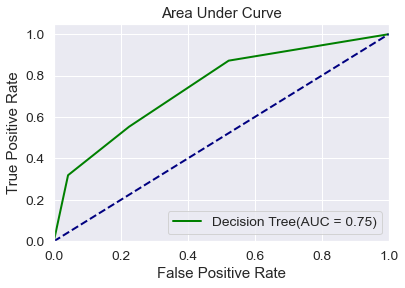

In [326]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

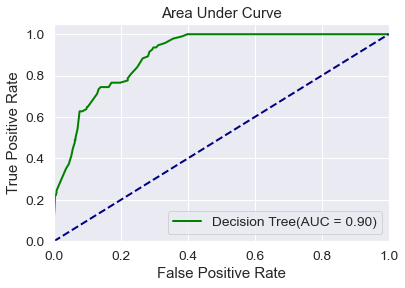

In [327]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_2)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()



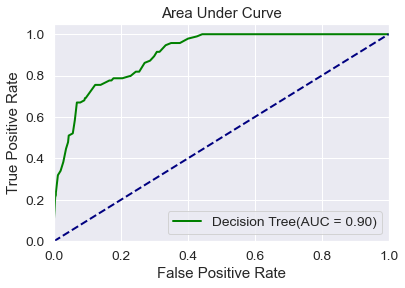

In [328]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_3)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

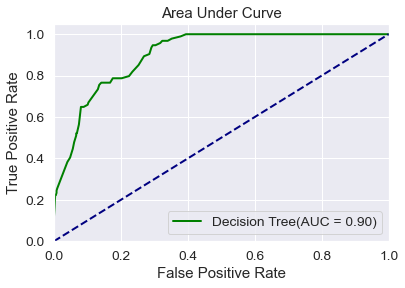

In [329]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_4)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### So model_dt_2 gives us the best AUC score ,so we will go with this parameters - min_samples_split=40,min_samples_leaf=5, max_depth=15


In [330]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
predictions = model_dt_2.predict(x_test)
print("accuracy_score is ",accuracy_score(y_test, predictions))
print("recall_score is ",recall_score(y_test, predictions))
print("precision_score is ",precision_score(y_test, predictions))

accuracy_score is  0.8622448979591837
recall_score is  0.3723404255319149
precision_score is  0.6140350877192983


### Insight - So based on Decision Tree the model_dt_2 looks good with parameters min_samples_split=40,min_samples_leaf=5, max_depth=15

### model_dt_4 with parameters min_samples_split=40,min_samples_leaf=3, max_depth=18 looks good as well from AUC curve,so lets check its accuracy and recall and precision score

In [331]:
predictions = model_dt_4.predict(x_test)
print("accuracy_score is ",accuracy_score(y_test, predictions))
print("recall_score is ",recall_score(y_test, predictions))
print("precision_score is ",precision_score(y_test, predictions))

accuracy_score is  0.8639455782312925
recall_score is  0.40425531914893614
precision_score is  0.6129032258064516


### model_dt_4 is not giving high recall score either

## Lets use GridSearchCV on the same decision tree 

In [332]:
import time
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
start = time.time()

model_dt = DecisionTreeClassifier()

param_dist = {'max_depth': [25,26,27,28,29,30],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_split':[7,8,9],
              'min_samples_leaf':[3,4,5,6],
              'criterion': ['gini']}

cv_model = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_model.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_model.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 27, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 7}
Time taken in grid search:  17.73


In [333]:
# Decision tree with depth = 15,min_samples_split=60,min_samples_leaf=16
model_dt_gridcv = DecisionTreeClassifier(min_samples_split=7,min_samples_leaf=3, max_depth=27)
model_dt_gridcv.fit(x_train, y_train)
model_dt_gridcv_score_train = model_dt_gridcv.score(x_train, y_train)
print("Training score: ",model_dt_gridcv_score_train)
model_dt_gridcv_score_test = model_dt_gridcv.score(x_test, y_test)
print("Testing score: ",model_dt_gridcv_score_test)

# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
y_pred_dt_gridcv = model_dt_gridcv.predict_proba(x_test)[:, 1]

Training score:  0.9693877551020408
Testing score:  0.8741496598639455


## Model Evaluation

## AUC Curve

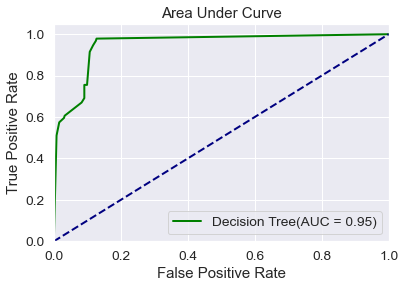

In [334]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_gridcv)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Predictions

In [335]:
predictions = model_dt_gridcv.predict(x_test)

## Confusion Matrix

In [336]:
print (confusion_matrix(y_test, predictions))

[[449  45]
 [ 29  65]]


## Accuracy, Recall, Precision

In [340]:
accuracy_dt_test=accuracy_score(y_test, predictions)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_dt_test))

Here is our mean accuracy on the test set:
 0.874


In [341]:
predictions_train = model_dt_gridcv.predict(x_train)

accuracy_dt_train=accuracy_score(y_train, predictions_train)

print("Here is our mean accuracy on the training set:\n {0:.3f}"\
      .format(accuracy_dt_train))

Here is our mean accuracy on the training set:
 0.969


In [342]:
recall_score(y_test, predictions)

0.6914893617021277

In [343]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.5909090909090909

### When we used GridSearchCV our Training and Testing accuracy is improved and our AUC curve shows a higher score of 0.95 .
### We also get improved Accuracy Recall and Precision score 

# 2. Random Forest Classifier

In [225]:
fit_rf = RandomForestClassifier(random_state=42)

## Hyper Parameterization Optimization using GridSearchCV


In [114]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [9,10,11,12,13,14,15],
              'bootstrap': [True],
              'max_features': ['auto'],
              'min_samples_split':[3,4,5,6,7],
              'min_samples_leaf':[2,3,4,5],
              'criterion': ['gini']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3}
Time taken in grid search:  348.20


In [226]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  min_samples_split = 3,
                  min_samples_leaf = 2,
                  bootstrap = True,
                  max_depth = 13)

RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

## OOB Rate to get the number of estimators parameter value

In [116]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000 
#320 
error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [117]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 800 trees)')

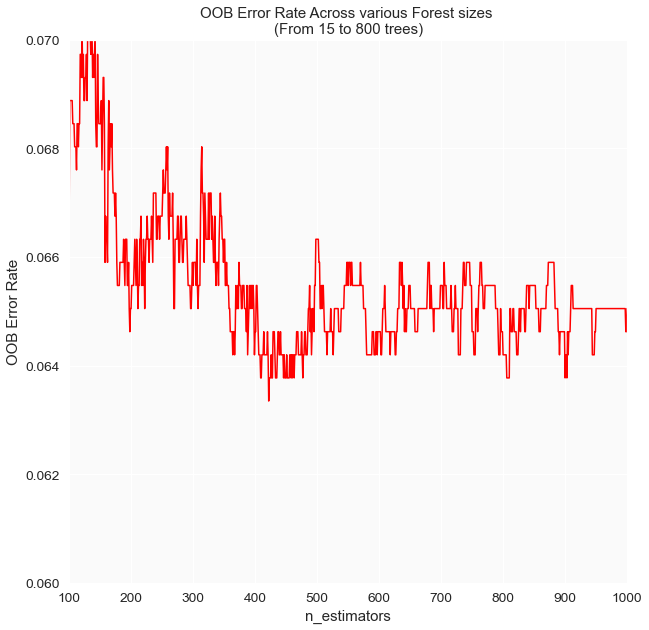

In [120]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
# plt.axhline(0.055, color='#875FDB',linestyle='--')
# plt.axhline(0.05, color='#875FDB',linestyle='--')
# plt.axhline(0.040, color='#875FDB',linestyle='--')
plt.axhline(0.0781, color='#875FDB',linestyle='--')
plt.axhline(0.077, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(100, 1000)
plt.ylim(0.060, 0.070)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 800 trees)')

In [227]:
print('OOB Error rate for 500 trees is: {0:.5f}'.format(oob_series[500]))

OOB Error rate for 500 trees is: 0.06633


In [228]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500, random_state=42)

In [229]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500, random_state=42)

In [231]:
model_rf_gridcv_score_train = fit_rf.score(x_train, y_train)
print("Training score: ",model_rf_gridcv_score_train)
model_rf_gridcv_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",model_rf_gridcv_score_test)

Training score:  0.9897959183673469
Testing score:  0.9285714285714286


## Model Evaluation
## Area Under Curve

In [234]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

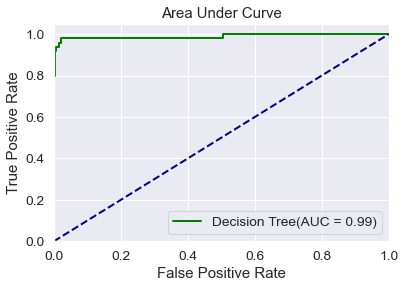

In [235]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Predictions

In [258]:
predictions_rf = fit_rf.predict(x_test)

## Accuracy

In [253]:
accuracy_rf_test=accuracy_score(y_test, predictions_rf)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf_test))

Here is our mean accuracy on the test set:
 0.929


In [260]:
predictions_rf_train = fit_rf.predict(x_train)
accuracy_rf_train=accuracy_score(y_train, predictions_rf_train)

print("Here is our mean accuracy on the training set:\n {0:.3f}"\
      .format(accuracy_rf_train))

Here is our mean accuracy on the training set:
 0.990


## Error Rate

In [254]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf_test
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0714


## Confusion Matrix

In [255]:
print (confusion_matrix(y_test, predictions_rf))

[[489   0]
 [ 42  57]]


## Recall , Precision Score

In [256]:
recall_score(y_test, predictions_rf)

0.5757575757575758

In [257]:
precision_score(y_test, predictions_rf)

1.0

### Insight 1 - We get an improved test and training score from Random Forest model with 92.8% and 98.9% respectively. 
### Insight 2 - Recall value is 57.5% and precision score is 100% which indicates that there were no false positives 
### Insight 3 - But ROC-AUC Curve shows a better graph with higher AUC score of 0.99 when compared to Decision Tree's AUC of 0.95

# 3. Building model using SVM 

In [344]:
TotalData.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41.0,Yes,Travel_Rarely,1102.0,Sales,2.0,2,Life Sciences,2,Female,...,Yes,12.0,3,1,0,8.0,2.0,1,6.0,0.0
1,43.0,No,Travel_Frequently,465.0,Research & Development,8.0,1,Life Sciences,3,Male,...,No,18.0,4,4,1,10.0,3.0,3,9.0,1.0
2,37.0,Yes,Travel_Rarely,1157.0,Research & Development,2.0,2,Other,4,Male,...,Yes,15.0,3,2,0,7.0,3.0,3,3.0,0.0
3,33.0,No,Travel_Frequently,1157.0,Research & Development,3.0,4,Life Sciences,4,Female,...,Yes,12.0,3,3,0,8.0,3.0,3,8.0,3.0
4,30.0,No,Travel_Rarely,591.0,Research & Development,2.0,1,Medical,1,Male,...,No,12.0,3,4,1,6.0,3.0,3,3.0,2.0


In [345]:
TotalData[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [348]:
TotalData.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              

## We need to do one hot encoding for the categorical and non rating data 

In [349]:
def encode_data_svm(TotalData):
    svm_data = TotalData.copy()
    le = preprocessing.LabelEncoder()
    svm_data['Attrition'] = le.fit_transform(TotalData['Attrition'])
    svm_data['BusinessTravel'] = le.fit_transform(TotalData['BusinessTravel'])
    svm_data['Department'] = le.fit_transform(TotalData['Department'])
    svm_data['EducationField'] = le.fit_transform(TotalData['EducationField'])
    svm_data['Gender'] = le.fit_transform(TotalData['Gender'])
    svm_data['JobRole'] = le.fit_transform(TotalData['JobRole'])
    svm_data['MaritalStatus'] = le.fit_transform(TotalData['MaritalStatus'])
    svm_data['OverTime'] = le.fit_transform(TotalData['OverTime'])
    print(svm_data.head(10))
    return svm_data

In [350]:
encoded_svm_df = encode_data_svm(TotalData)

    Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  41.0          1               2     1102.0           2               2.0   
1  43.0          0               1      465.0           1               8.0   
2  37.0          1               2     1157.0           1               2.0   
3  33.0          0               1     1157.0           1               3.0   
4  30.0          0               2      591.0           1               2.0   
5  32.0          0               1     1005.0           1               2.0   
6  43.0          0               2     1157.0           1               3.0   
7  30.0          0               2     1157.0           1              14.0   
8  38.0          0               1      465.0           1              14.0   
9  36.0          0               2     1157.0           1              14.0   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  OverTime  \
0          2               1                      

In [351]:
encoded_svm_df.dtypes

Age                         float64
Attrition                     int32
BusinessTravel                int32
DailyRate                   float64
Department                    int32
DistanceFromHome            float64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                      int32
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              

In [352]:
x = encoded_svm_df.drop(['Attrition'],axis =1).values
y = encoded_svm_df['Attrition'].values

## Feature Scaling

In [353]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## Train-Test Split

In [354]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## SVM With Default HyperParameters

In [355]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8809523809523809


## Using GridSearchCV

In [385]:
svm_model = SVC()

In [386]:
tuned_parameters = {
 'degree': [2,3,4,5,6,7,8] ,'gamma':[0.01,0.02,0.03], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly','rbf','linear']
                   }

In [387]:
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [388]:
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)

0.896265777136675


In [389]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 2, 'gamma': 0.03, 'kernel': 'rbf'}


In [391]:
#We will use the values from best params while creating our svc object before fitting our training data in the model
# svc=SVC(C=0.8, degree=5, gamma=0.05, kernel='poly',probability=True) 
svc=SVC(C=0.9, degree=2, gamma=0.03, kernel='rbf',probability=True) 
svc.fit(x_train, y_train)

SVC(C=0.9, degree=2, gamma=0.03, probability=True)

In [392]:
accuracy_svm_test = svc.score(x_test, y_test)

print("Here is our accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_svm_test))

Here is our accuracy on the test set:
 0.878


In [401]:
accuracy_svm_train = svc.score(x_train, y_train)

print("Here is our mean accuracy on the training set:\n {0:.3f}"\
      .format(accuracy_svm_train))

Here is our mean accuracy on the training set:
 0.936


## Predictions

In [402]:
predictions_svm = svc.predict(x_test)

## Model Evaluation
## Area Under Curve

In [403]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = svc.predict_proba(x_test)[:, 1]

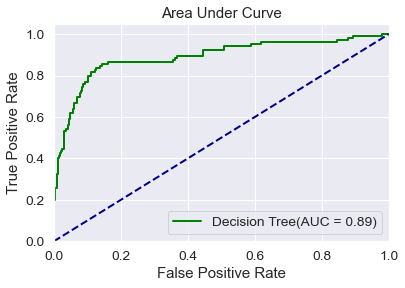

In [404]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Error Rate

In [405]:
test_error_rate_rf = 1 - accuracy_svm_test
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1224


## Confusion Matrix

In [406]:
print (confusion_matrix(y_test, predictions_svm))

[[477   6]
 [ 66  39]]


## Recall

In [407]:
recall_score(y_test, predictions_svm)

0.37142857142857144

## Precision

In [408]:
precision_score(y_test, predictions_svm)

0.8666666666666667

### Insight - We are getting a decent model with good testing and training accuracy of 87.8 and 93.6 percentage respectively
### Insight - But our recall value is low 

## Lets see if we can make the accuracy better 

In [427]:
svm_model_2 = SVC()

In [428]:
tuned_parameters = {
 'degree': [2,3,4,5,6,7,8] ,'gamma':[0.01,0.02,0.03,0.04], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly','rbf','linear']
                   }

In [429]:
model_svm_2 = GridSearchCV(svm_model_2, tuned_parameters,cv=10,scoring='accuracy')

In [430]:
model_svm_2.fit(x_train, y_train)
print(model_svm_2.best_score_)

0.9434547421565093


In [431]:
print(model_svm_2.best_params_)

{'C': 0.9, 'degree': 5, 'gamma': 0.04, 'kernel': 'poly'}


In [432]:
#We will use the values from best params while creating our svc object before fitting our training data in the model
svc_new=SVC(C=0.9, degree=5, gamma=0.04, kernel='poly',probability=True) 
svc_new.fit(x_train, y_train)

SVC(C=0.9, degree=5, gamma=0.04, kernel='poly', probability=True)

## Accuracy

In [433]:
accuracy_svm_test = svc_new.score(x_test, y_test)

print("Here is our accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_svm_test))

Here is our accuracy on the test set:
 0.930


In [434]:
accuracy_svm_train = svc_new.score(x_train, y_train)

print("Here is our mean accuracy on the training set:\n {0:.3f}"\
      .format(accuracy_svm_train))

Here is our mean accuracy on the training set:
 0.986


## Model Evaluation
## AUC Curve

In [435]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = svc_new.predict_proba(x_test)[:, 1]

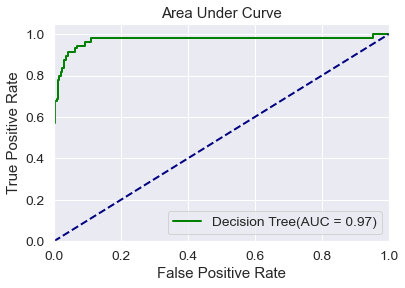

In [436]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Predictions

In [437]:
predictions_svm = svc_new.predict(x_test)

## Confusion Matrix

In [438]:
print (confusion_matrix(y_test, predictions_svm))

[[481   2]
 [ 39  66]]


## Recall

In [439]:
recall_score(y_test, predictions_svm)

0.6285714285714286

## Precision 

In [440]:
precision_score(y_test, predictions_svm)

0.9705882352941176

### Insight 1- SVM gave us a model which accurately predicts 98.6% with training data and 93% with testing data
### Insight 2- For this model even Recall value is also higher than Random Forest models that means the proportion of actual positives getting predicted correctly is higher 
### Insight 3- AUC-ROC curve with a AUC score of 0.97

### Insight 4 - Even though the AUC score from Random Forest had a higher AUC of 0.99 and from SVM we are getting 0.97 , but my suggestion would be to take the SVM model as the recall value is also higher in case of SVM along with the fact that testing and training accuracies are closer . The training accuracy is 99% from Random Forst model which is very close to making it overfit , so even though its a great model but choosing SVM would be a safer choice


# Using Logistic Regression

In [124]:
TotalData.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41.0,Yes,Travel_Rarely,1102.0,Sales,2.0,2,Life Sciences,2,Female,...,Yes,12.0,3,1,0,8.0,2.0,1,6.0,0.0
1,43.0,No,Travel_Frequently,465.0,Research & Development,8.0,1,Life Sciences,3,Male,...,No,18.0,4,4,1,10.0,3.0,3,9.0,1.0
2,37.0,Yes,Travel_Rarely,1157.0,Research & Development,2.0,2,Other,4,Male,...,Yes,15.0,3,2,0,7.0,3.0,3,3.0,0.0
3,33.0,No,Travel_Frequently,1157.0,Research & Development,3.0,4,Life Sciences,4,Female,...,Yes,12.0,3,3,0,8.0,3.0,3,8.0,3.0
4,30.0,No,Travel_Rarely,591.0,Research & Development,2.0,1,Medical,1,Male,...,No,12.0,3,4,1,6.0,3.0,3,3.0,2.0


In [125]:
TotalData[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [126]:
TotalData.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              

In [127]:
def encode_data_lr(TotalData):
    lr_data = TotalData.copy()
    le = preprocessing.LabelEncoder()
    lr_data['Attrition'] = le.fit_transform(TotalData['Attrition'])
    lr_data['BusinessTravel'] = le.fit_transform(TotalData['BusinessTravel'])
    lr_data['Department'] = le.fit_transform(TotalData['Department'])
    lr_data['EducationField'] = le.fit_transform(TotalData['EducationField'])
    lr_data['Gender'] = le.fit_transform(TotalData['Gender'])
    lr_data['JobRole'] = le.fit_transform(TotalData['JobRole'])
    lr_data['MaritalStatus'] = le.fit_transform(TotalData['MaritalStatus'])
    lr_data['OverTime'] = le.fit_transform(TotalData['OverTime'])
    return lr_data

In [128]:
encoded_lr_df = encode_data_lr(TotalData)

In [129]:
x = encoded_lr_df.drop(['Attrition'],axis =1).values
y = encoded_lr_df['Attrition'].values

## Feature Scaling

In [130]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## Train-Test Split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Logistic Regression

In [132]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression()

## Predictions

In [133]:
predictions=logreg.predict(x_test)

## Accuracy

In [137]:
accuracy_lr_train = logreg.score(x_train,y_train)
print("Here is our accuracy on the train set:\n {0:.3f}"\
      .format(accuracy_lr_train))

accuracy_lr_test = logreg.score(x_test,y_test)
print("Here is our accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_lr_test))

Here is our accuracy on the train set:
 0.883
Here is our accuracy on the test set:
 0.862


## Model Evaluation

## AUC Curve

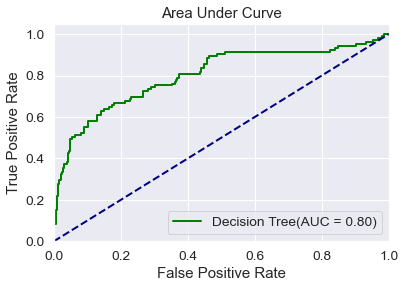

In [148]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob_lr = logreg.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions_prob_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [143]:
print ("Confusion Matrix:\n",confusion_matrix(y_test, predictions))

Confusion Matrix:
 [[473  10]
 [ 71  34]]


## Precision and Recall

In [144]:
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))

Precision: 0.7727272727272727
Recall: 0.3238095238095238


### Insight 1 - With Logistic Regression model we get decent and close testing and training scores but they are not as high as that from SVM or Random Forest 
### Insight 2 - The AUC score is even though decent but when compared to that of SVM and RF , its low .
### Insight 3 - The recall value is very low , i.e only 32.3% of actual positives from unseen data are correctly predicted 

# Final Summary - Based on the evidence we got above , I would suggest we use the SVM model with the following parameters :
# {'C': 0.9, 'degree': 5, 'gamma': 0.04, 'kernel': 'poly'} to predict whether a new employee will quit or not 